-----------------------
# Credit Risk Modeling

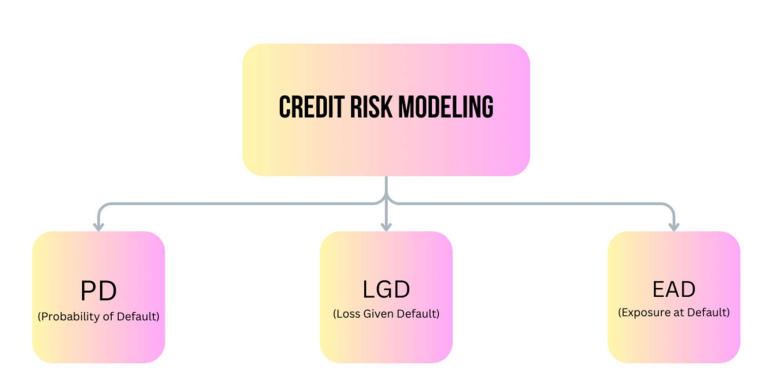



Credit risk modeling is a critical process in the financial sector, helping institutions assess the risk associated with lending money to borrowers. This process involves evaluating various risk components to determine the likelihood of a borrower defaulting on a loan, the potential loss in the event of default, and the total exposure at the time of default.

## 1. Probability of Default (PD)

The Probability of Default (PD) is a key component in credit risk modeling, representing the likelihood that a borrower will fail to meet their debt obligations.

### 1.1. What is PD?

PD is typically expressed as a percentage, indicating the probability that a borrower will default on a loan within a specific time period.

### 1.2. Factors Influencing PD

Several factors can influence PD, including the borrower's credit history, income, employment status, and the current economic conditions. Financial institutions analyze these factors to estimate PD and make informed lending decisions.

## 2. Loss Given Default (LGD)

Loss Given Default (LGD) quantifies the potential loss to the lender in the event of a borrower default.

### 2.1. What is LGD?

LGD is expressed as a percentage of the total exposure, representing the portion of the loan that is lost when a borrower defaults, after accounting for any recoveries from collateral or other sources.

### 2.2. Factors Influencing LGD

LGD is influenced by the presence and quality of collateral, the seniority of the debt, and the efficiency of legal processes to recover the outstanding debt. Secured loans typically have lower LGD compared to unsecured loans.

## 3. Exposure at Default (EAD)

Exposure at Default (EAD) represents the total amount the lender is exposed to when a borrower defaults on a loan.

### 3.1. What is EAD?

EAD includes not just the outstanding principal at the time of default but also any accrued interest, fees, and other charges.

### 3.2. Factors Influencing EAD

EAD can be influenced by the borrower's credit line utilization, loan terms, and payment behavior. Understanding EAD is crucial for lenders to adequately provision for potential losses.

----------------

# In this notebook...
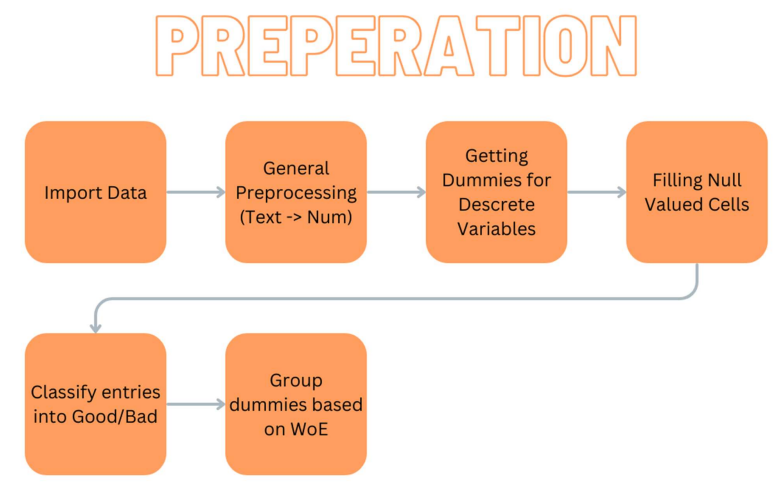

# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Import Data


In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

## Data Dictionary -> LCDataDictionary.xlsx

C:\Users\saras\AppData\Local\Temp\ipykernel_33392\2954675577.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')


In [3]:
loan_data_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
loan_data = loan_data_backup.copy()

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Explore Data

In [7]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83     C  ...   
2                2400.0   36 months     15.96        84.33     C  ...   
3               10000.0   36 months     13.49       339.31     C  ...   
4                3000.0   60 months     12.69        67.79     B  ...   
...                 ...         ...       ...          ...   ...  ...   
466280          18400.0   60 months     14.47       432.64     C  ...   
466281          22000.0   60 months     19.97       582.50     D  ...   
466282          20700.0   60 months     16.99       514.34     D  ...   
466283           2000.0   36 months      7.90        62.59     A  ...   
466284           9975.0   36 months     19.20       367.58     D  ...   

       total_bal_il il_util open_rv_12m open_rv_24m  max_bal_bc all_util  \
0               NaN     NaN         NaN         NaN         NaN      NaN   
1               NaN     NaN         NaN         NaN         NaN      NaN   
2               NaN     NaN         NaN         NaN         NaN      NaN   
3               NaN     NaN         NaN         NaN         NaN      NaN   
4               NaN     NaN         NaN         NaN         NaN      NaN   
...             ...     ...         ...         ...         ...      ...   
466280          NaN     NaN         NaN         NaN         NaN      NaN   
466281          NaN     NaN         NaN         NaN         NaN      NaN   
466282          NaN     NaN         NaN         NaN         NaN      NaN   
466283          NaN     NaN         NaN         NaN         NaN      NaN   
466284          NaN     NaN         NaN         NaN         NaN      NaN   

       total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
0                   NaN    NaN         NaN          NaN  
1                   NaN    NaN         NaN          NaN  
2                   NaN    NaN         NaN          NaN  
3                   NaN    NaN         NaN          NaN  
4                   NaN    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
466280          29900.0    NaN         NaN          NaN  
466281          39400.0    NaN         NaN          NaN  
466282          13100.0    NaN         NaN          NaN  
466283          53100.0    NaN         NaN          NaN  
466284          16000.0    NaN         NaN          NaN  

[466285 rows x 75 columns]

In [9]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [10]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
4                3000.0   60 months     12.69        67.79     B        B5   
...                 ...         ...       ...          ...   ...       ...   
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
4          80000.0     Source Verified  Dec-11      Current          n   
...            ...                 ...     ...          ...        ...   
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
4       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466280  https://www.lendingclub.com/browse/loanDetail....   


In [7]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [8]:
loan_data.tail()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
466280  https://www.lendingclub.com/browse/loanDetail....   
466281  https://www.lendingclub.com/browse/loanDetail....   
466282  https://www.lendingclub.com/browse/loanDetail....   
466283  https://www.lendingclub.com/browse/loanDetail....   
466284  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
466280                                                NaN  debt_consolidation   
466281                                                NaN  debt_consolidation   
466282    Borrower added on 12/06/13 > I am going to c...  debt_consolidation   
466283                                                NaN         credit_card   
466284    Borrower added on 12/04/13 > I will like a l...               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
466280           Apr-03             2.0                     NaN   
466281           Jun-97             5.0                     NaN   
466282           Dec-01             2.0                    65.0   
466283           Feb-03             1.0                    13.0   
466284           Feb-00             0.0                     9.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
466280                     NaN      18.0      0.0      23208        77.6   
466281                   116.0      18.0      1.0      18238        46.3   
466282                     NaN      18.0      0.0       6688        51.1   
466283                     NaN      21.0      0.0      11404        21.5   
466284                     NaN       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \


In [5]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
## Sample Exploratory Data Analysis 
## https://github.com/akshayr89/Lending-Club---Exploratory-Data-Analysis/blob/master/AkshayRohankar_LendingClub.ipynb

## General Preprocessing

### Preprocessing few continuous variables

In [17]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
# 'loan_data['emp_length'].str.extract('(\d+)')' - This part uses the 'extract' function to find and return 
# any numeric values (\d+ is a regular expression that matches one or more digits) in the 'emp_length' column. 
# The 'str' before 'extract' is necessary because 'extract' is a string method.

# '.astype(float)' - This part converts the extracted string numbers into float. 'astype' is a function that 
# is used to change (or cast) the data type of a pandas Series or DataFrame.

# '.fillna(0)' - This part replaces any NaN values in the series with 0. 'fillna' is a function that is used 
# to fill NA/NaN values in the DataFrame.

# 'loan_data['emp_length_int'] =' - This part assigns the resulting series back to a new column in the 
# 'loan_data' DataFrame called 'emp_length_int'.

loan_data['emp_length_int'] = loan_data['emp_length'].str.extract('(\d+)').astype(float).fillna(0)

In [13]:
loan_data['emp_length_int'].unique()

array([10.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.,  0.])

In [18]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [19]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
# Transforms the values to numeric.

In [20]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [21]:
loan_data['earliest_cr_line']
# Displays a column.

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [22]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.

In [23]:
type(loan_data['earliest_cr_line_date'][0])
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
# Calculates the difference between two dates and times.

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [25]:
# Assume we are now in December 2017
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

In [26]:
loan_data['mths_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [27]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
# There are 2303 strange negative values.

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [28]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
# We set the rows that had negative differences to the maximum value.

C:\Users\saras\AppData\Local\Temp\ipykernel_33392\653136197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [29]:
min(loan_data['mths_since_earliest_cr_line'])
# Calculates and shows the minimum value of a column.

73.0

In [30]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [31]:
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [32]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [33]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [34]:
type(loan_data['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [35]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [36]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [37]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [38]:
# Assume we are now in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [39]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, we are not going to use sub_grade, as it overlaps with grade.

In [40]:
pd.get_dummies(loan_data['grade'])
# Create dummy variables from a variable.

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [41]:

pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')
# Create dummy variables from a variable.

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [42]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [43]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [44]:
type(loan_data_dummies)
# Returns the type of the variable.

pandas.core.frame.DataFrame

In [45]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

In [46]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values and clean

In [47]:
loan_data.isnull()
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0       False     False        False  False      False       True       False   
1       False     False        False  False      False      False       False   
2       False     False        False  False      False       True       False   
3       False     False        False  False      False      False       False   
4       False     False        False  False      False      False       False   
...       ...       ...          ...    ...        ...        ...         ...   
466280  False     False        False  False      False      False       False   
466281  False     False        False  False      False      False       False   
466282  False     False        False  False      False      False       False   
466283  False     False        False  False      False      False       False   
466284  False     False        False  False      False       True       False   

        home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0                False       False                False    False        False   
1                False       False                False    False        False   
2                False       False                False    False        False   
3                False       False                False    False        False   
4                False       False                False    False        False   
...                ...         ...                  ...      ...          ...   
466280           False       False                False    False        False   
466281           False       False                False    False        False   
466282           False       False                False    False        False   
466283           False       False                False    False        False   
466284           False       False                False    False        False   

        pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0            False  False  False    False  False     False       False  False   
1            False  False  False    False  False     False       False  False   
2            False  False   True    False  False     False       False  False   
3            False  False  False    False  False     False       False  False   
4            False  False  False    False  False     False       False  False   
...            ...    ...    ...      ...    ...       ...         ...    ...   
466280       False  False   True    False  False     False       False  False   
466281       False  False   True    False  False     False       False  False   
466282       False  False  False    False  False     False       False  False   
466283       False  False   True    False  False     False       False  False   
466284       False  False  False    False  False     False       False  False   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0             False             Fal

In [48]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [50]:
pd.options.display.max_rows = 10
# Sets the pandas dataframe options to display 10 columns/ rows.

In [51]:
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
# We fill the missing values with the values of another variable.

In [52]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [53]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [54]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [55]:
loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [56]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [57]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [58]:
# Defining Target Variable for Probability of Default (PD) Model -> Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [59]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

### Splitting Data

In [61]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [62]:
#train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [63]:
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.

In [64]:
#loan_data_inputs_train.shape
# Displays the size of the dataframe.

In [65]:
#loan_data_targets_train.shape
# Displays the size of the dataframe.

In [66]:
#loan_data_inputs_test.shape
# Displays the size of the dataframe.

In [67]:
#loan_data_targets_test.shape
# Displays the size of the dataframe.

In [68]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [69]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(373028, 207)

In [70]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(373028,)

In [71]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(93257, 207)

In [72]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(93257,)

### Data Preparation: An Example 

In [73]:

df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
#####
# df_inputs_prepr = loan_data_inputs_test
# df_targets_prepr = loan_data_targets_test
#####

In [74]:
df_inputs_prepr['grade'].unique()
# Displays unique values of a column.

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [75]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
# Concatenates two dataframes along the columns.
df1.head()

grade  good_bad
427211     A         1
206088     C         1
136020     A         1
412305     D         0
36159      C         0

In [76]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

grade  good_bad
0     A     59759
1     B    109730
2     C    100245
3     D     61498
4     E     28612
5     F     10530
6     G      2654

In [77]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.

grade  good_bad
0     A  0.961044
1     B  0.921015
2     C  0.885770
3     D  0.846304
4     E  0.805257
5     F  0.754416
6     G  0.727958

In [78]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.

In [79]:
df1

grade  good_bad grade  good_bad
0     A     59759     A  0.961044
1     B    109730     B  0.921015
2     C    100245     C  0.885770
3     D     61498     D  0.846304
4     E     28612     E  0.805257
5     F     10530     F  0.754416
6     G      2654     G  0.727958

In [80]:
df1 = df1.iloc[:, [0, 1, 3]]
# Selects only columns with specific indexes.
df1

grade  good_bad  good_bad
0     A     59759  0.961044
1     B    109730  0.921015
2     C    100245  0.885770
3     D     61498  0.846304
4     E     28612  0.805257
5     F     10530  0.754416
6     G      2654  0.727958

In [81]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
df1

grade   n_obs  prop_good
0     A   59759   0.961044
1     B  109730   0.921015
2     C  100245   0.885770
3     D   61498   0.846304
4     E   28612   0.805257
5     F   10530   0.754416
6     G    2654   0.727958

In [82]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

grade   n_obs  prop_good  prop_n_obs
0     A   59759   0.961044    0.160200
1     B  109730   0.921015    0.294160
2     C  100245   0.885770    0.268733
3     D   61498   0.846304    0.164862
4     E   28612   0.805257    0.076702
5     F   10530   0.754416    0.028228
6     G    2654   0.727958    0.007115

In [83]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad
0     A   59759   0.961044    0.160200   57431.0   2328.0
1     B  109730   0.921015    0.294160  101063.0   8667.0
2     C  100245   0.885770    0.268733   88794.0  11451.0
3     D   61498   0.846304    0.164862   52046.0   9452.0
4     E   28612   0.805257    0.076702   23040.0   5572.0
5     F   10530   0.754416    0.028228    7944.0   2586.0
6     G    2654   0.727958    0.007115    1932.0    722.0

In [84]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   
1     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
2     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
5     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
6     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   

   prop_n_bad  
0    0.057090  
1    0.212541  
2    0.280813  
3    0.231792  
4    0.136642  
5    0.063417  
6    0.017706

# Weight of Evidence (WoE)


### Weight of Evidence (WoE) is a concept used in statistics and predictive modeling, especially in credit scoring and risk assessment. To explain it in simple terms:

### 1. Comparison of Two Groups: WoE measures how the predictive power of an independent variable differs for various outcomes. For example, in credit scoring, it compares the likelihood of default (bad outcome) to the likelihood of non-default (good outcome) for different borrower characteristics.

### 2. Calculation: It is calculated as the natural logarithm (log) of the ratio of the distribution of good outcomes to bad outcomes. For instance, if a particular group of borrowers has a high number of defaults compared to non-defaults, the WoE for that group would be a negative number, indicating a higher risk.

### Interpretation:

### a. A high positive WoE value suggests that the presence of a particular characteristic is more likely to lead to a good outcome.
### b. A high negative WoE value suggests that the characteristic is more likely to lead to a bad outcome.
### c. A WoE near zero means the characteristic is not particularly predictive of the outcome.


Weight of Evidence (WoE) is a powerful tool in the domain of predictive modeling and risk management. It is extensively used in the field of credit risk to transform variables and to gain a deeper understanding of their predictive power.

## 1. Understanding WoE

### 1.1 Definition

WoE is computed as the natural logarithm of the ratio of the percentage of non-events to the percentage of events.

$$
\text{WoE} = \ln \left( \frac{\text{Percentage of Non-Events}}{\text{Percentage of Events}} \right)
$$

- **Events**: Cases where the outcome of interest is present (e.g., loan default).
- **Non-Events**: Cases where the outcome of interest is absent (e.g., no loan default).

### 1.2 Purpose

WoE provides a method to encode categorical variables and transform continuous variables to establish a monotonic relationship with the dependent variable. It is also used to handle missing values and outliers.

## 2. Advantages of WoE

### 2.1 Predictive Power

WoE transformations can help increase the predictive power of a model.

### 2.2 Handling Missing Values and Outliers

WoE can efficiently handle missing values and outliers.

### 2.3 Intuitive Interpretation

WoE offers an intuitive understanding of the variable’s influence. Higher positive values indicate a greater likelihood of non-events, whereas higher negative values indicate a greater likelihood of events.

## 3. WoE Value Range and Interpretation

The value of WoE ranges from negative infinity to positive infinity.

- **WoE = 0**: Indicates that the percentage of events and non-events are the same. The variable has no predictive power.
- **WoE > 0**: Indicates that the group has more non-events. The higher the WoE, the stronger the prediction for a non-event.
- **WoE < 0**: Indicates that the group has more events. The lower the WoE, the stronger the prediction for an event.

## 4. How to Calculate WoE

1. Divide the dataset into bins based on the values of the independent variable.
2. Calculate the number of events and non-events in each bin.
3. Calculate the percentage of events and the percentage of non-events for each bin.
4. Use the formula to calculate WoE for each bin.

## 5. Conclusion

Weight of Evidence is a significant technique in credit scoring and risk assessment. It transforms variables to enhance the model’s predictive power, and it provides a clear and intuitive way to understand the impact of variables on the prediction. By understanding the WoE value range and its interpretation, analysts can make more informed decisions in model development and risk assessment.


In [85]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   
1     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
2     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
5     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
6     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   

   prop_n_bad       WoE  
0    0.057090  1.107830  
1    0.212541  0.358476  
2    0.280813 -0.049503  
3    0.231792 -0.391843  
4    0.136642 -0.678267  
5    0.063417 -0.975440  
6    0.017706 -1.113459

In [86]:
df1 = df1.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   
1     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
2     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
5     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
6     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   

   prop_n_bad       WoE  
0    0.017706 -1.113459  
1    0.063417 -0.975440  
2    0.136642 -0.678267  
3    0.231792 -0.391843  
4    0.280813 -0.049503  
5    0.212541  0.358476  
6    0.057090  1.107830

In [87]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   
1     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
2     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
5     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
6     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.017706 -1.113459             NaN       NaN  
1    0.063417 -0.975440        0.026458  0.138019  
2    0.136642 -0.678267        0.050841  0.297173  
3    0.231792 -0.391843        0.041047  0.286424  
4    0.280813 -0.049503        0.039466  0.342340  
5    0.212541  0.358476        0.035245  0.407979  
6    0.057090  1.107830        0.040028  0.749353

# Information Value (IV)

Information Value (IV) is a statistical measure used to determine the predictive power of an independent variable in relation to a dependent variable. It helps to identify which variables are important for predicting the target variable. IV is widely used in credit scoring, risk management, and predictive modeling.

## Formula

The Information Value is calculated using the following formula:


\[ IV = \sum (P_{Good} - P_{Bad}) \times \ln\left(\frac{P_{Good}}{P_{Bad}}\right) \]



where:
- \( P_{Good} \) is the proportion of positive outcomes in a specific group.
- \( P_{Bad} \) is the proportion of negative outcomes in the same group.
- The summation is done over all the groups.

## Range of Values

The range of values for Information Value is \( [0, \infty) \). Here’s how to interpret these values:

- **< 0.02**: The variable is considered useless for prediction.
- **0.02 to 0.10**: The variable has weak predictive power.
- **0.10 to 0.30**: The variable has medium predictive power.
- **0.30 to 0.50**: The variable has strong predictive power.
- **> 0.50**: The variable may indicate suspicious behaviour.


It’s important to note that a very high Information Value, much greater than 0.3, may indicate that the variable is too good to be true and could be overfitting the model. Additionally, variables with very low Information Value might not be useful for the model and could potentially be removed.

## Example

Let's calculate the Information Value for a hypothetical binary classification problem where we are trying to predict if a customer will default on a loan. Suppose we have a variable 'Age' with the following distribution:

| Age Group | Good Customers | Bad Customers | Total |
|-----------|----------------|---------------|-------|
| 20-30     | 80             | 20            | 100   |
| 30-40     | 120            | 30            | 150   |
| 40-50     | 100            | 10            | 110   |
| 50+       | 50             | 5             | 55    |
| **Total** | **350**        | **65**        | **415** |

To calculate IV for the 'Age' variable:

1. Calculate \( P_{Good} \) and \( P_{Bad} \) for each age group.
2. Apply the IV formula for each group and sum the results.
3. Interpret the result based on the ranges mentioned above.


In [88]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   
1     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
2     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
5     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
6     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017706 -1.113459             NaN       NaN  0.288636  
1    0.063417 -0.975440        0.026458  0.138019  0.288636  
2    0.136642 -0.678267        0.050841  0.297173  0.288636  
3    0.231792 -0.391843        0.041047  0.286424  0.288636  
4    0.280813 -0.049503        0.039466  0.342340  0.288636  
5    0.212541  0.358476        0.035245  0.407979  0.288636  
6    0.057090  1.107830        0.040028  0.749353  0.288636

### Preprocessing Discrete Variables: Automating Calculaions

In [89]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [90]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   
1     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
2     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
5     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
6     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017706 -1.113459             NaN       NaN  0.288636  
1    0.063417 -0.975440        0.026458  0.138019  0.288636  
2    0.136642 -0.678267        0.050841  0.297173  0.288636  
3    0.231792 -0.391843        0.041047  0.286424  0.288636  
4    0.280813 -0.049503        0.039466  0.342340  0.288636  
5    0.212541  0.358476        0.035245  0.407979  0.288636  
6    0.057090  1.107830        0.040028  0.749353  0.288636

### Preprocessing Discrete Variables: Visualizing Results

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [92]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

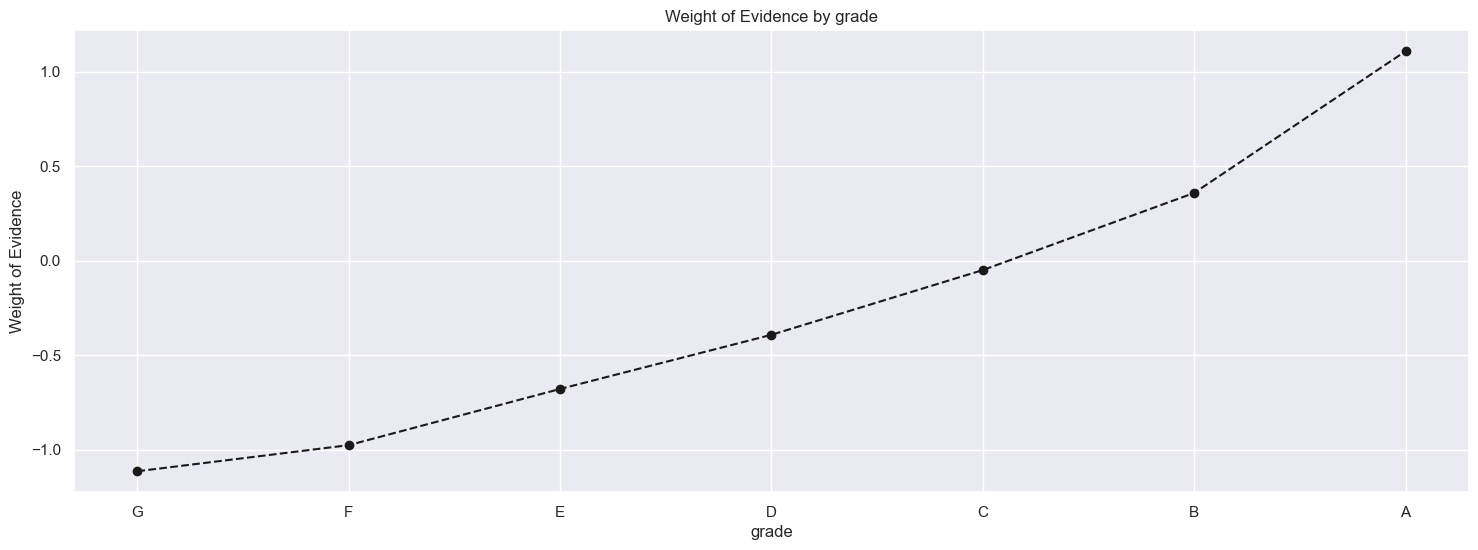

In [93]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [94]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     137   0.795620    0.000367     109.0     28.0   
1           NONE      40   0.850000    0.000107      34.0      6.0   
2           RENT  150599   0.873870    0.403720  131604.0  18995.0   
3            OWN   33295   0.892536    0.089256   29717.0   3578.0   
4       MORTGAGE  188956   0.903835    0.506546  170785.0  18171.0   
5            ANY       1   1.000000    0.000003       1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000328    0.000687 -0.738602             NaN       NaN  inf  
1     0.000102    0.000147 -0.363144        0.054380  0.375458  inf  
2     0.396099    0.465815 -0.162123        0.023870  0.201021  inf  
3     0.089442    0.087743  0.019170        0.018666  0.181294  inf  
4     0.514026    0.445608  0.142834        0.011298  0.123663  inf  
5     0.000003    0.000000       inf        0.096165       inf  inf

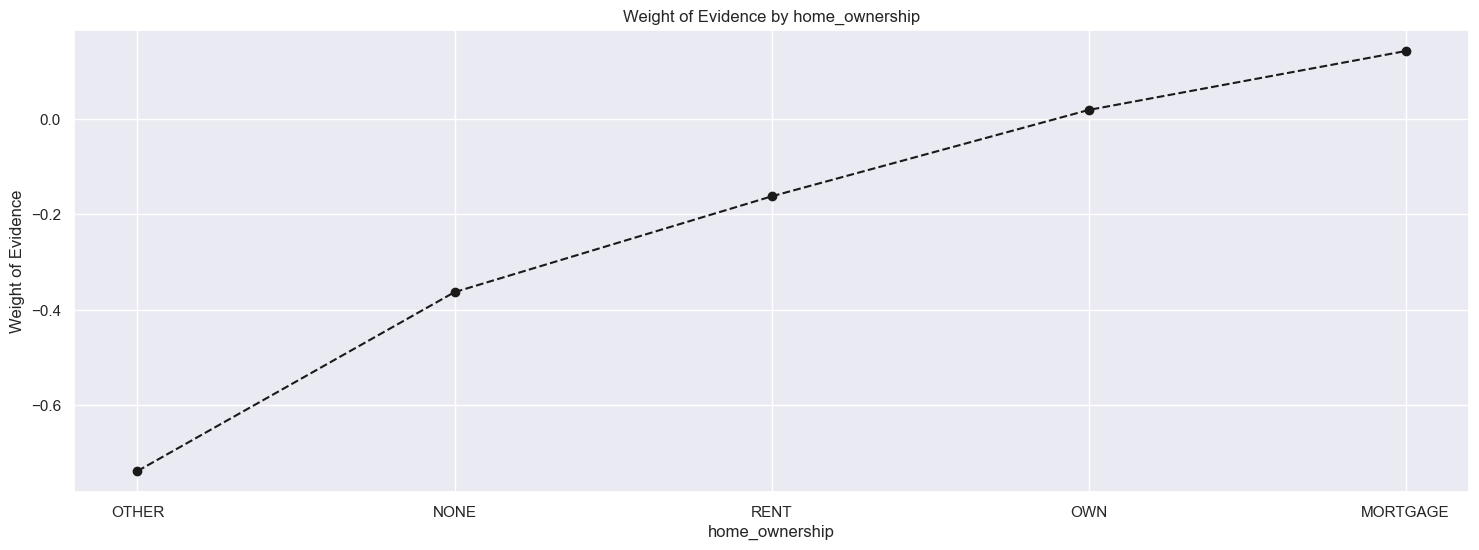

In [95]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [96]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [97]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [98]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     13   0.461538    0.000035      6.0     7.0     0.000018   
1          IA     13   0.769231    0.000035     10.0     3.0     0.000030   
2          NV   5221   0.864585    0.013996   4514.0   707.0     0.013586   
3          FL  25211   0.875808    0.067585  22080.0  3131.0     0.066456   
4          HI   2001   0.877061    0.005364   1755.0   246.0     0.005282   
..        ...    ...        ...         ...      ...     ...          ...   
45         NH   1830   0.921858    0.004906   1687.0   143.0     0.005078   
46         WY    919   0.928183    0.002464    853.0    66.0     0.002567   
47         DC   1129   0.934455    0.003027   1055.0    74.0     0.003175   
48         ME      2   1.000000    0.000005      2.0     0.0     0.000006   
49         ID     10   1.000000    0.000027     10.0     0.0     0.000030   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000172 -2.251896             NaN       NaN  inf  
1     0.000074 -0.893772        0.307692  1.358123  inf  
2     0.017338 -0.243837        0.095355  0.649935  inf  
3     0.076782 -0.144425        0.011223  0.099411  inf  
4     0.006033 -0.132852        0.001253  0.011573  inf  
..         ...       ...             ...       ...  ...  
45    0.003507  0.370117        0.001816  0.024951  inf  
46    0.001619  0.461360        0.006325  0.091242  inf  
47    0.001815  0.559486        0.006272  0.098126  inf  
48    0.000000       inf        0.065545       inf  inf  
49    0.000000       inf        0.000000       NaN  inf  

[50 rows x 12 columns]

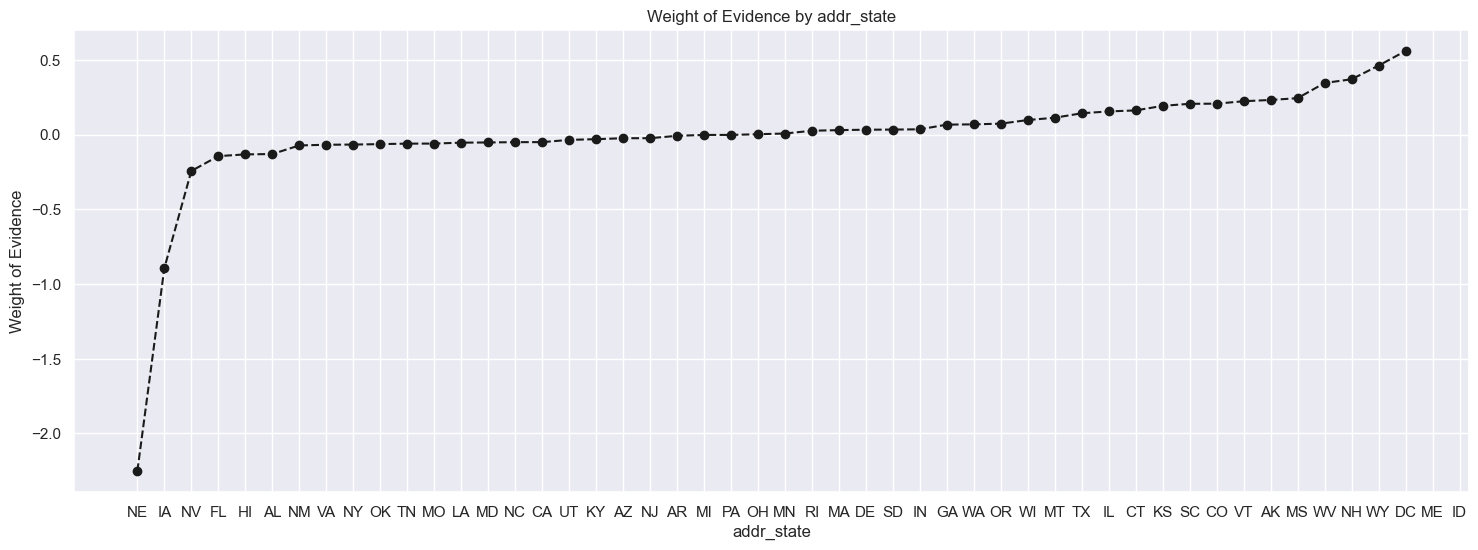

In [99]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [101]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

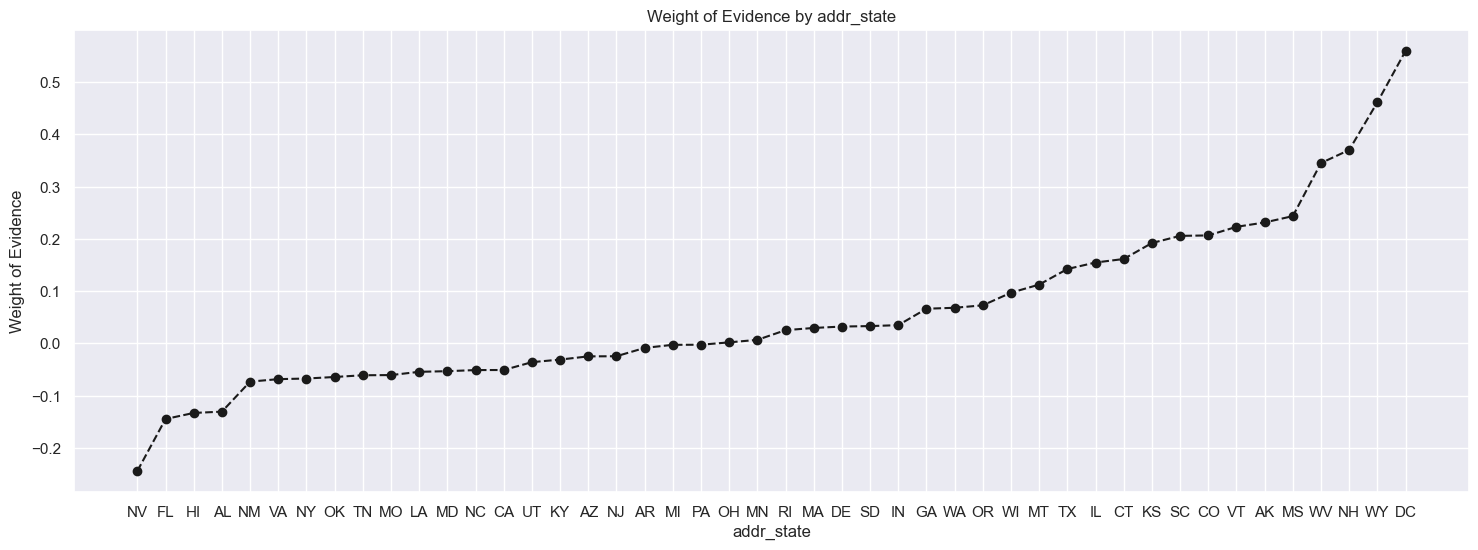

In [102]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

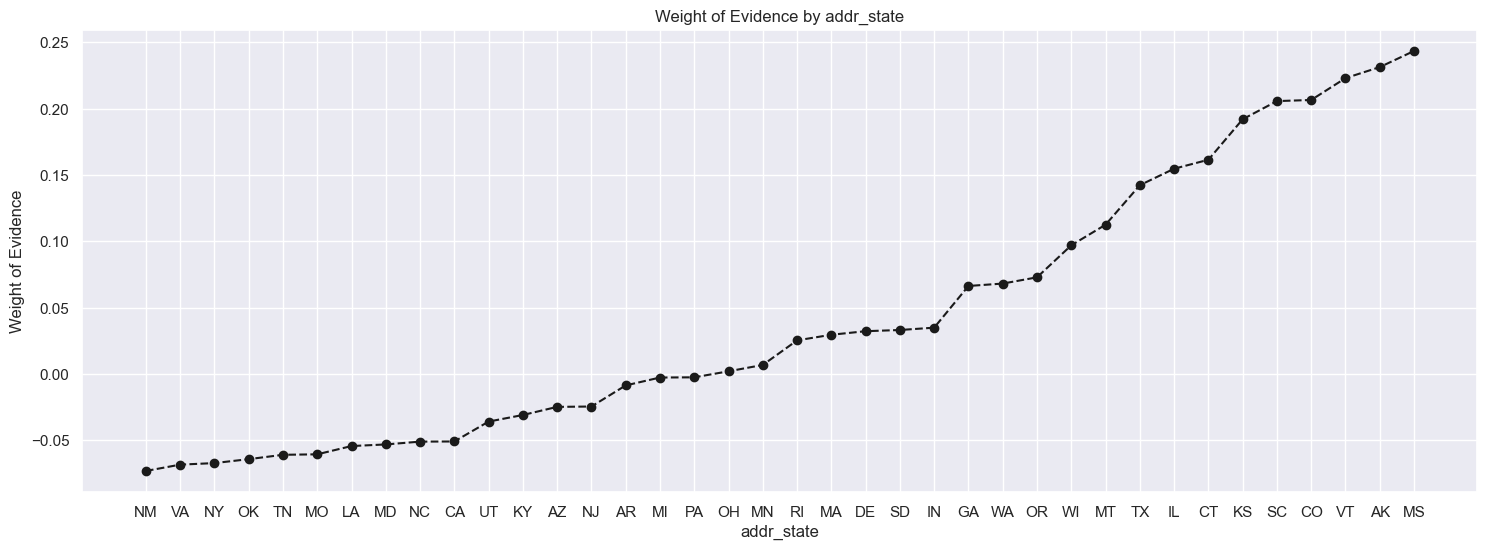

In [103]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [104]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables

In [105]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  134414   0.872781    0.360332  117314.0  17100.0   
1     Source Verified  120030   0.895918    0.321772  107537.0  12493.0   
2        Not Verified  118584   0.905679    0.317896  107399.0  11185.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353090    0.419344 -0.171969             NaN       NaN  0.020384  
1     0.323663    0.306366  0.054922        0.023137  0.226891  0.020384  
2     0.323248    0.274290  0.164232        0.009761  0.109311  0.020384

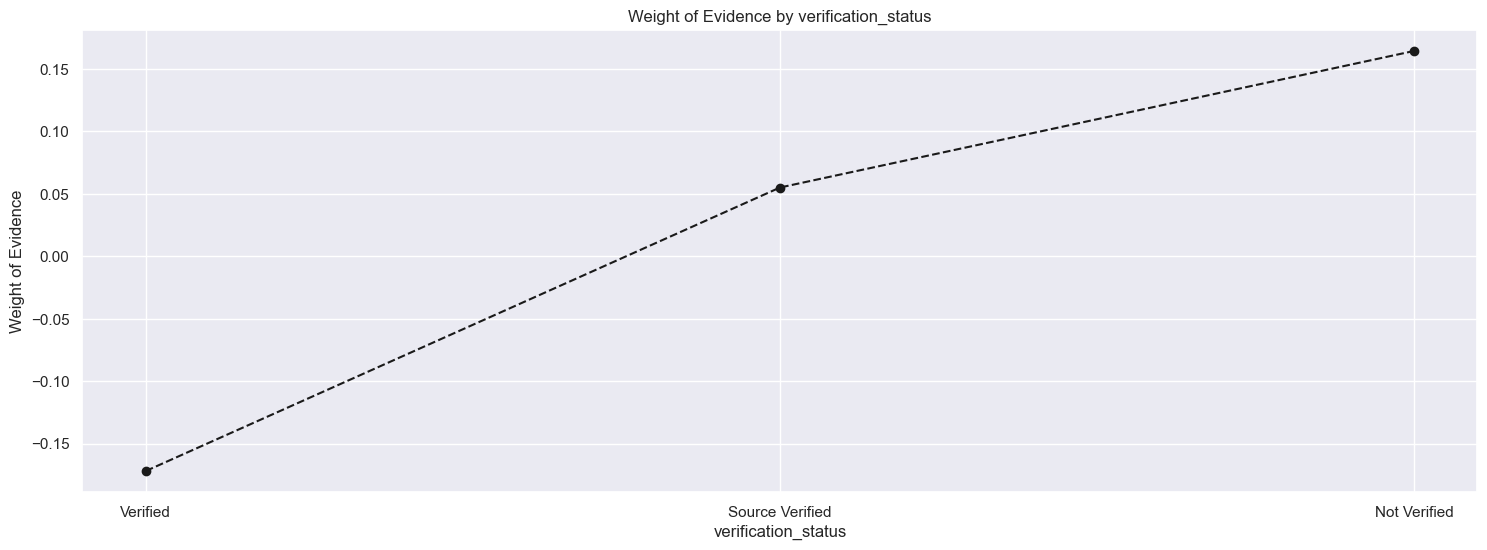

In [106]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [107]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    5582   0.786098    0.014964    4388.0   1194.0   
1          educational     333   0.801802    0.000893     267.0     66.0   
2               moving    2392   0.839465    0.006412    2008.0    384.0   
3                house    1830   0.860109    0.004906    1574.0    256.0   
4                other   18884   0.862264    0.050624   16283.0   2601.0   
..                 ...     ...        ...         ...       ...      ...   
9   debt_consolidation  219183   0.886884    0.587578  194390.0  24793.0   
10    home_improvement   21238   0.900697    0.056934   19129.0   2109.0   
11      major_purchase    7837   0.905449    0.021009    7096.0    741.0   
12                 car    4325   0.909595    0.011594    3934.0    391.0   
13         credit_card   83581   0.913102    0.224061   76318.0   7263.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.013207    0.029280 -0.796180             NaN       NaN  0.035418  
1      0.000804    0.001619 -0.700151        0.015704  0.096029  0.035418  
2      0.006044    0.009417 -0.443493        0.037663  0.256658  0.035418  
3      0.004737    0.006278 -0.281547        0.020644  0.161946  0.035418  
4      0.049008    0.063784 -0.263519        0.002155  0.018028  0.035418  
..          ...         ...       ...             ...       ...       ...  
9      0.585071    0.607999 -0.038440        0.004413  0.043263  0.035418  
10     0.057574    0.051719  0.107247        0.013812  0.145687  0.035418  
11     0.021357    0.018172  0.161541        0.004752  0.054294  0.035418  
12     0.011840    0.009589  0.210959        0.004147  0.049419  0.035418  
13     0.229701    0.178111  0.254371        0.003507  0.043411  0.035418  

[14 rows x 12 columns]

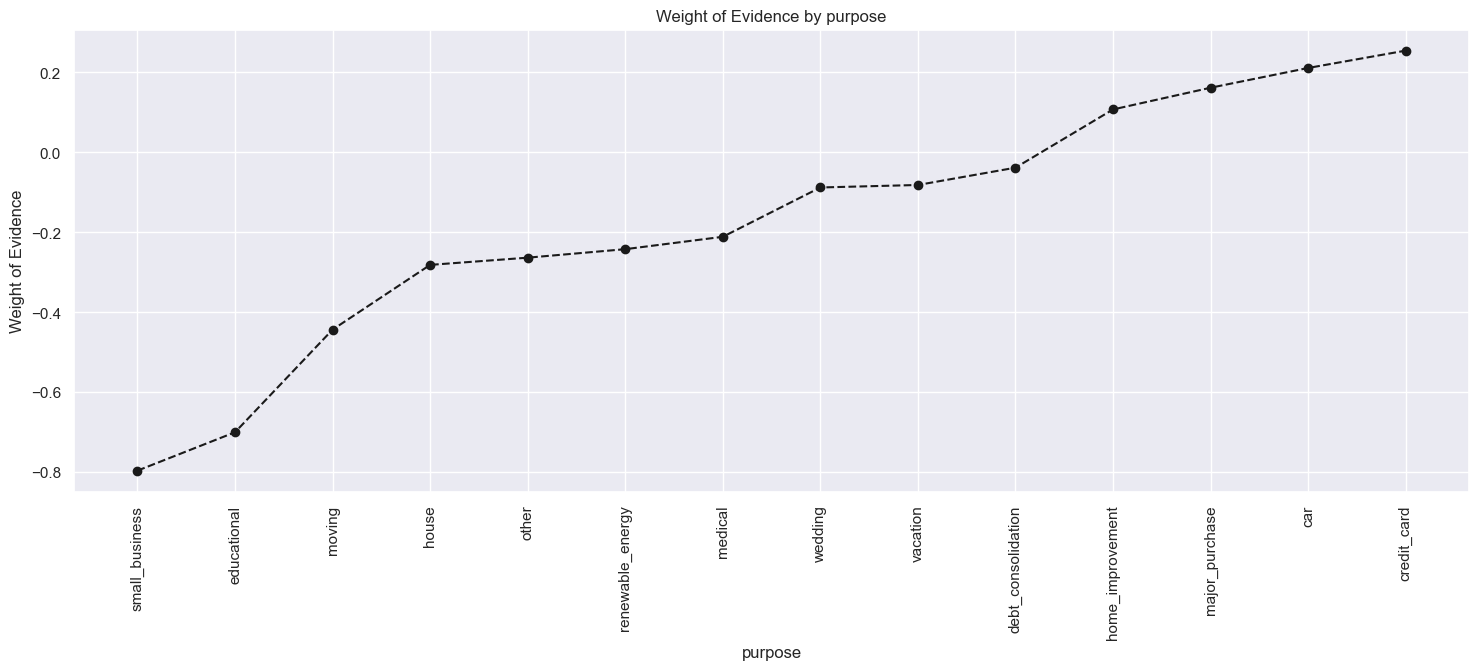

In [108]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [109]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [110]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  242514   0.879694    0.650123  213338.0  29176.0   
1                   w  130514   0.911105    0.349877  118912.0  11602.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.642101    0.715484 -0.108214             NaN       NaN  0.02478  
1     0.357899    0.284516  0.229461        0.031412  0.337675  0.02478

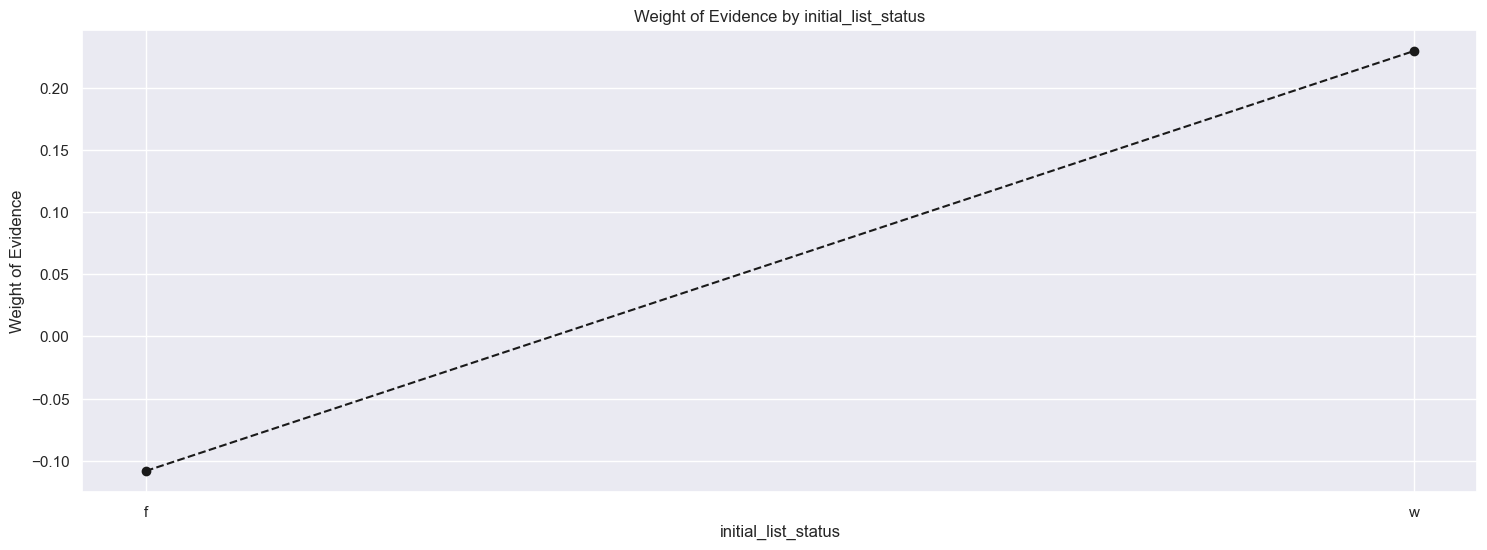

In [111]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [112]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [113]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [114]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  270419   0.902995    0.724929  244187.0  26232.0      0.73495   
1        60  102609   0.858239    0.275071   88063.0  14546.0      0.26505   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.643288  0.133209             NaN       NaN  0.039434  
1    0.356712 -0.297009        0.044756  0.430218  0.039434

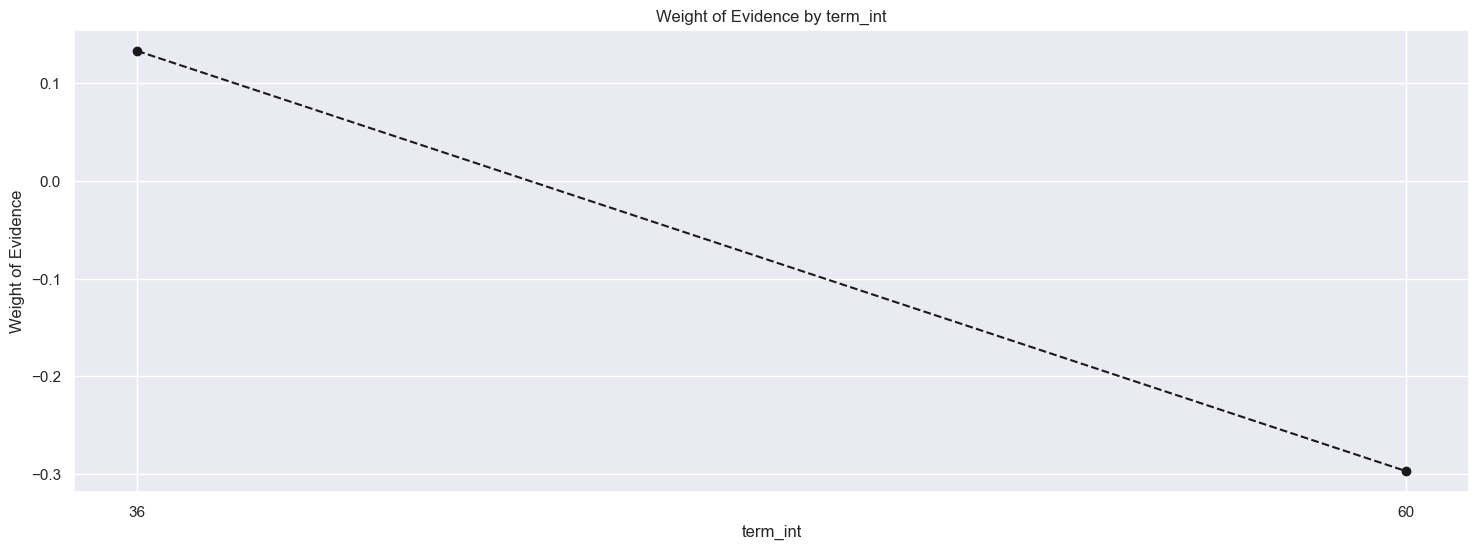

In [115]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [116]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [117]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  1.,  2.,  9.,  8.,  0.,  4.])

In [118]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   16808   0.868218    0.045058   14593.0   2215.0   
1              1.0   52566   0.883784    0.140917   46457.0   6109.0   
2              2.0   33078   0.890955    0.088674   29471.0   3607.0   
3              3.0   29205   0.890772    0.078292   26015.0   3190.0   
4              4.0   22468   0.890644    0.060231   20011.0   2457.0   
..             ...     ...        ...         ...       ...      ...   
6              6.0   20887   0.883899    0.055993   18462.0   2425.0   
7              7.0   21049   0.887453    0.056427   18680.0   2369.0   
8              8.0   17853   0.889878    0.047860   15887.0   1966.0   
9              9.0   14267   0.886662    0.038246   12650.0   1617.0   
10            10.0  120245   0.900312    0.322348  108258.0  11987.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.043922    0.054319 -0.212455             NaN       NaN  0.006815  
1      0.139825    0.149811 -0.068981        0.015567  0.143475  0.006815  
2      0.088701    0.088455  0.002785        0.007171  0.071766  0.006815  
3      0.078299    0.078228  0.000907        0.000183  0.001878  0.006815  
4      0.060229    0.060253 -0.000404        0.000128  0.001311  0.006815  
..          ...         ...       ...             ...       ...       ...  
6      0.055567    0.059468 -0.067862        0.000826  0.008071  0.006815  
7      0.056223    0.058095 -0.032759        0.003554  0.035102  0.006815  
8      0.047816    0.048212 -0.008245        0.002425  0.024515  0.006815  
9      0.038074    0.039654 -0.040660        0.003217  0.032416  0.006815  
10     0.325833    0.293958  0.102950        0.013650  0.143610  0.006815  

[11 rows x 12 columns]

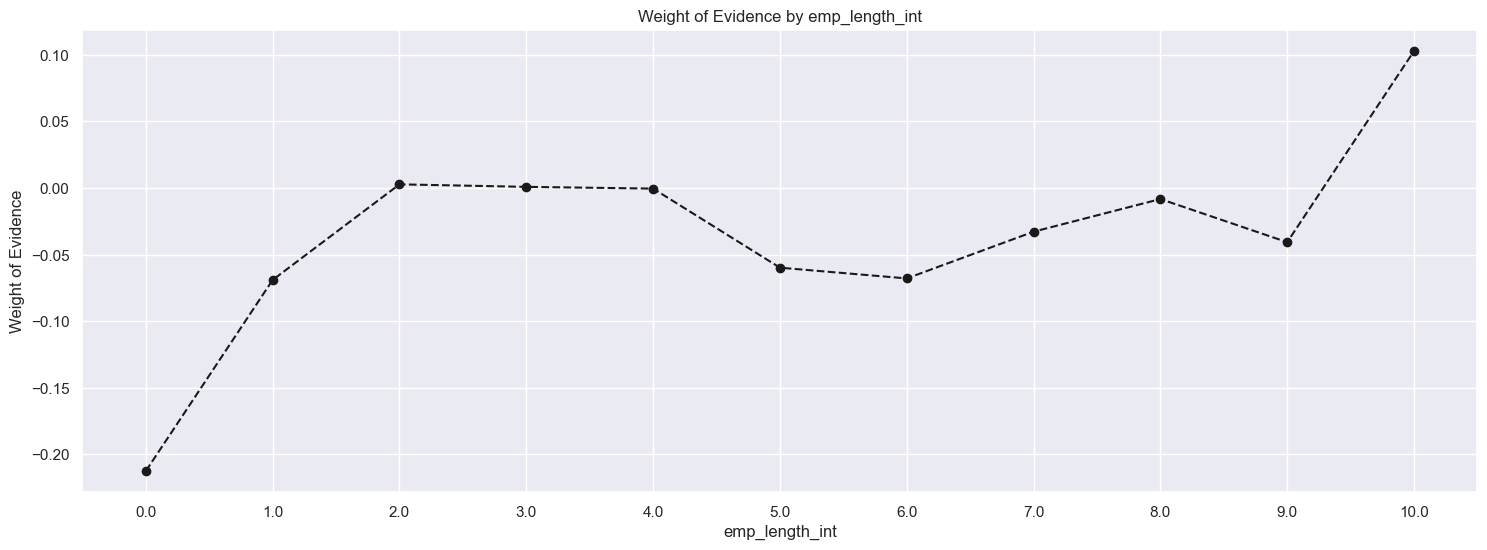

In [119]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [120]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [121]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [122]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [123]:
df_inputs_prepr['mths_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [124]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              (35.91, 37.8]  28170   0.942244    0.075517  26543.0  1627.0   
1               (37.8, 39.6]  39636   0.928424    0.106255  36799.0  2837.0   
2               (39.6, 41.4]  38614   0.917284    0.103515  35420.0  3194.0   
3               (41.4, 43.2]  29038   0.908603    0.077844  26384.0  2654.0   
4               (43.2, 45.0]  28367   0.901787    0.076045  25581.0  2786.0   
..                       ...    ...        ...         ...      ...     ...   
45            (117.0, 118.8]    247   0.797571    0.000662    197.0    50.0   
46            (118.8, 120.6]    394   0.723350    0.001056    285.0   109.0   
47            (120.6, 122.4]    176   0.704545    0.000472    124.0    52.0   
48            (122.4, 124.2]    104   0.750000    0.000279     78.0    26.0   
49            (124.2, 126.0]     70   0.885714    0.000188     62.0     8.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.079889    0.039899  0.694283             NaN       NaN  0.113186  
1      0.110757    0.069572  0.464979        0.013820  0.229305  0.113186  
2      0.106606    0.078327  0.308258        0.011140  0.156721  0.113186  
3      0.079410    0.065084  0.198945        0.008681  0.109313  0.113186  
4      0.076993    0.068321  0.119498        0.006815  0.079447  0.113186  
..          ...         ...       ...             ...       ...       ...  
45     0.000593    0.001226 -0.726564        0.035307  0.206048  0.113186  
46     0.000858    0.002673 -1.136604        0.074221  0.410039  0.113186  
47     0.000373    0.001275 -1.228707        0.018805  0.092103  0.113186  
48     0.000235    0.000638 -0.999133        0.045455  0.229574  0.113186  
49     0.000187    0.000196 -0.050052        0.135714  0.949081  0.113186  

[50 rows x 12 columns]

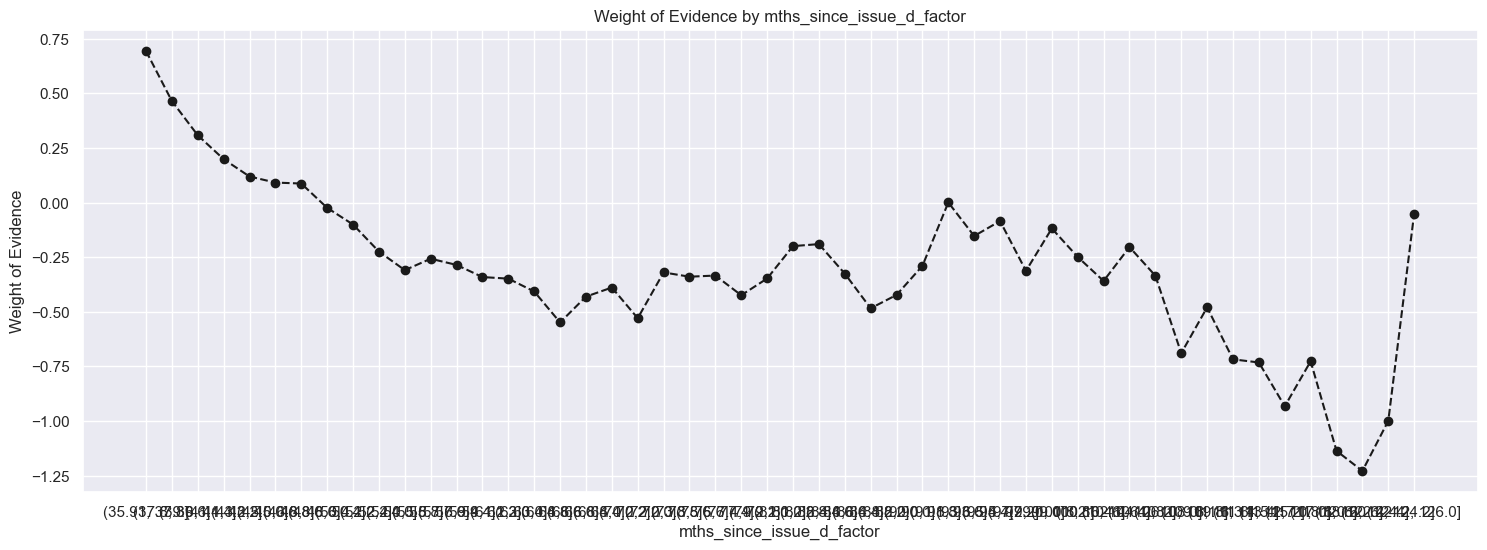

In [125]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

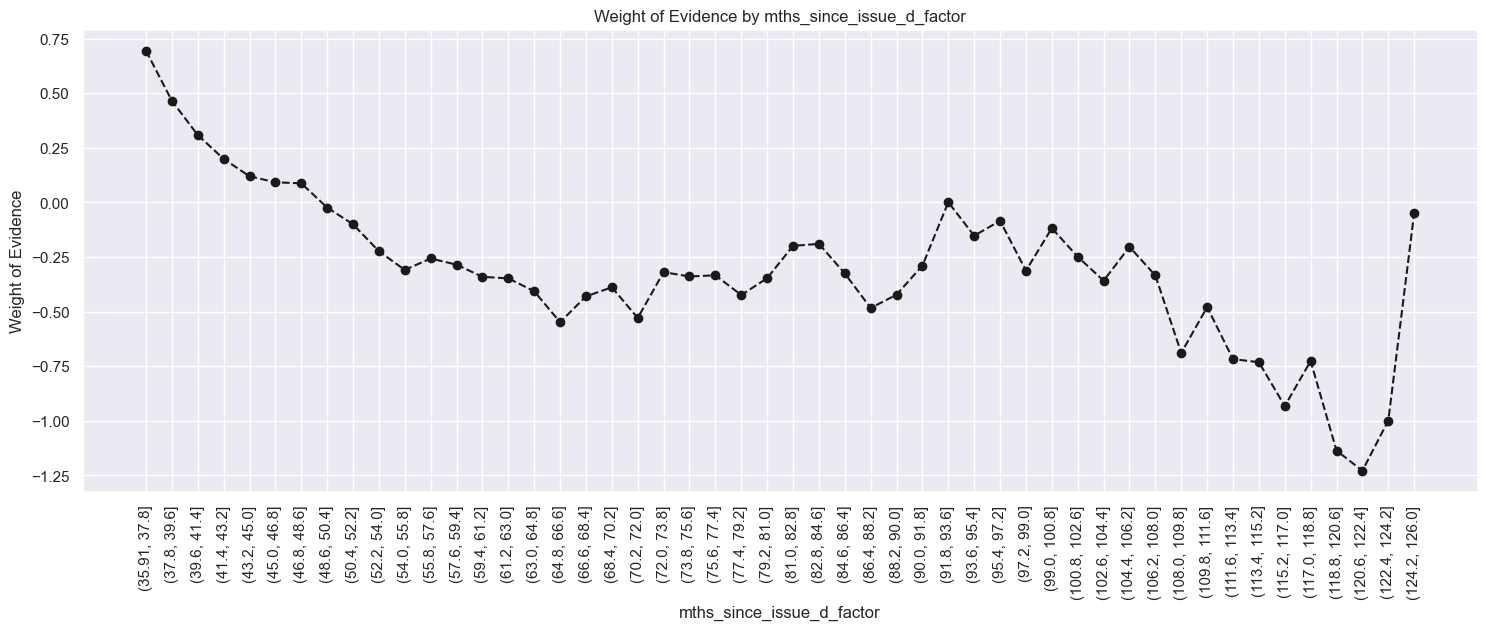

In [126]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

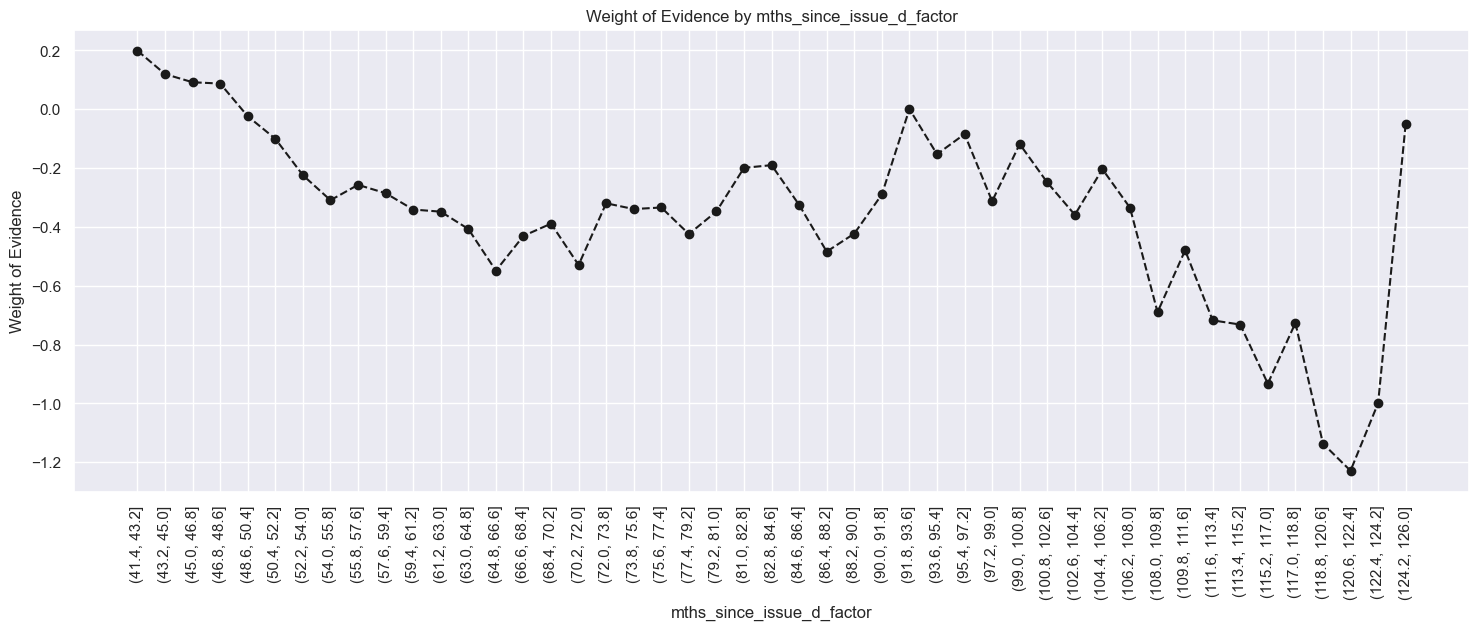

In [127]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [128]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [129]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [130]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    785   0.961783    0.002104   755.0   30.0   
1     (5.833, 6.246]   8459   0.980376    0.022677  8293.0  166.0   
2     (6.246, 6.658]   7826   0.971505    0.020980  7603.0  223.0   
3     (6.658, 7.071]   1816   0.973018    0.004868  1767.0   49.0   
4     (7.071, 7.484]   3143   0.976456    0.008426  3069.0   74.0   
..               ...    ...        ...         ...     ...    ...   
45  (23.996, 24.409]   1455   0.767698    0.003901  1117.0  338.0   
46  (24.409, 24.822]   1664   0.762620    0.004461  1269.0  395.0   
47  (24.822, 25.234]   1315   0.771103    0.003525  1014.0  301.0   
48  (25.234, 25.647]    778   0.736504    0.002086   573.0  205.0   
49   (25.647, 26.06]   1786   0.754759    0.004788  1348.0  438.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002272    0.000736  1.127775             NaN       NaN  0.343349  
1      0.024960    0.004071  1.813434        0.018592  0.685659  0.343349  
2      0.022883    0.005469  1.431381        0.008871  0.382053  0.343349  
3      0.005318    0.001202  1.487473        0.001512  0.056092  0.343349  
4      0.009237    0.001815  1.627297        0.003438  0.139824  0.343349  
..          ...         ...       ...             ...       ...       ...  
45     0.003362    0.008289 -0.902389        0.043604  0.230494  0.343349  
46     0.003819    0.009687 -0.930646        0.005077  0.028257  0.343349  
47     0.003052    0.007381 -0.883197        0.008482  0.047449  0.343349  
48     0.001725    0.005027 -1.069869        0.034599  0.186672  0.343349  
49     0.004057    0.010741 -0.973587        0.018255  0.096283  0.343349  

[50 rows x 12 columns]

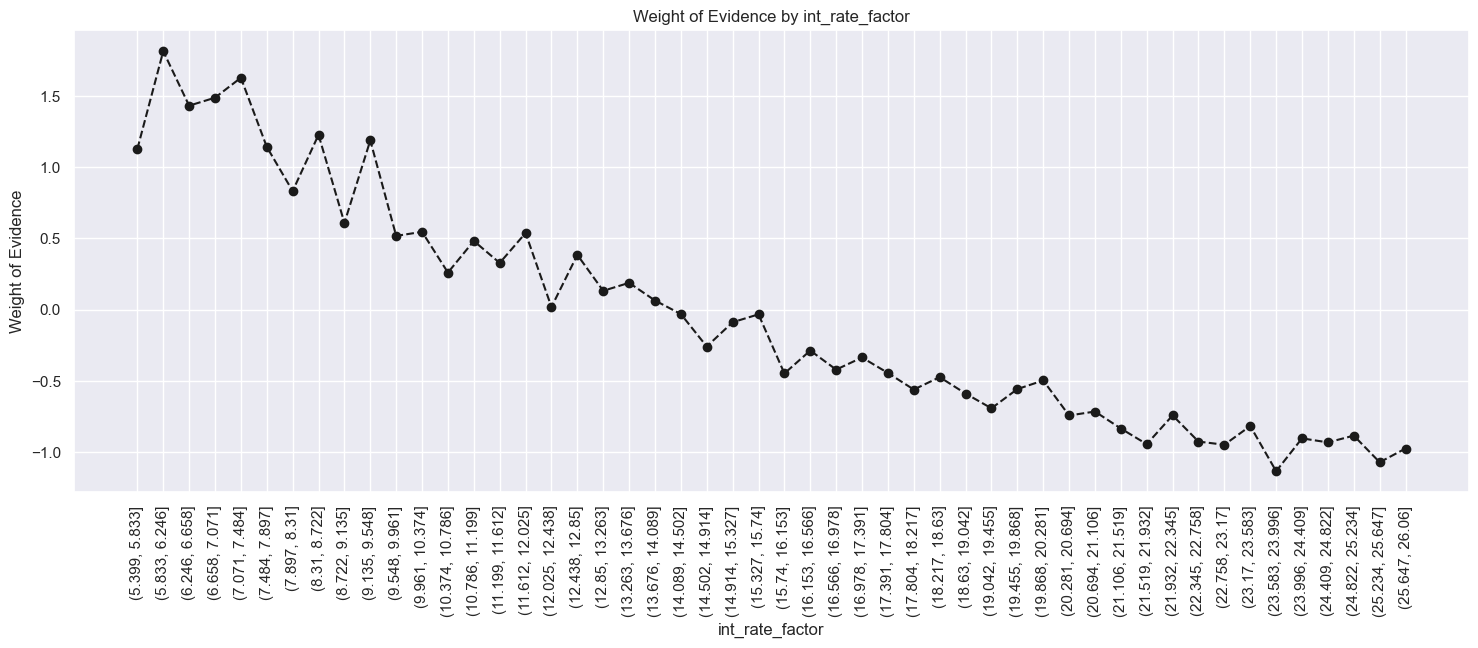

In [131]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [132]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [133]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [134]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1190.0]   1224   0.905229    0.003281   1108.0   116.0   
1     (1190.0, 1880.0]   3028   0.903897    0.008117   2737.0   291.0   
2     (1880.0, 2570.0]   6018   0.893819    0.016133   5379.0   639.0   
3     (2570.0, 3260.0]   7248   0.889073    0.019430   6444.0   804.0   
4     (3260.0, 3950.0]   4751   0.891602    0.012736   4236.0   515.0   
..                 ...    ...        ...         ...      ...     ...   
45  (31550.0, 32240.0]   1326   0.872549    0.003555   1157.0   169.0   
46  (32240.0, 32930.0]    631   0.874802    0.001692    552.0    79.0   
47  (32930.0, 33620.0]   1090   0.895413    0.002922    976.0   114.0   
48  (33620.0, 34310.0]    492   0.890244    0.001319    438.0    54.0   
49  (34310.0, 35000.0]  13553   0.883199    0.036332  11970.0  1583.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003335    0.002845  0.158977             NaN       NaN  0.014139  
1      0.008238    0.007136  0.143549        0.001332  0.015427  0.014139  
2      0.016190    0.015670  0.032608        0.010078  0.110941  0.014139  
3      0.019395    0.019717 -0.016440        0.004746  0.049048  0.014139  
4      0.012749    0.012629  0.009463        0.002529  0.025902  0.014139  
..          ...         ...       ...             ...       ...       ...  
45     0.003482    0.004144 -0.174058        0.010935  0.102159  0.014139  
46     0.001661    0.001937 -0.153645        0.002253  0.020413  0.014139  
47     0.002938    0.002796  0.049519        0.020611  0.203164  0.014139  
48     0.001318    0.001324 -0.004510        0.005169  0.054029  0.014139  
49     0.036027    0.038820 -0.074663        0.007045  0.070153  0.014139  

[50 rows x 12 columns]

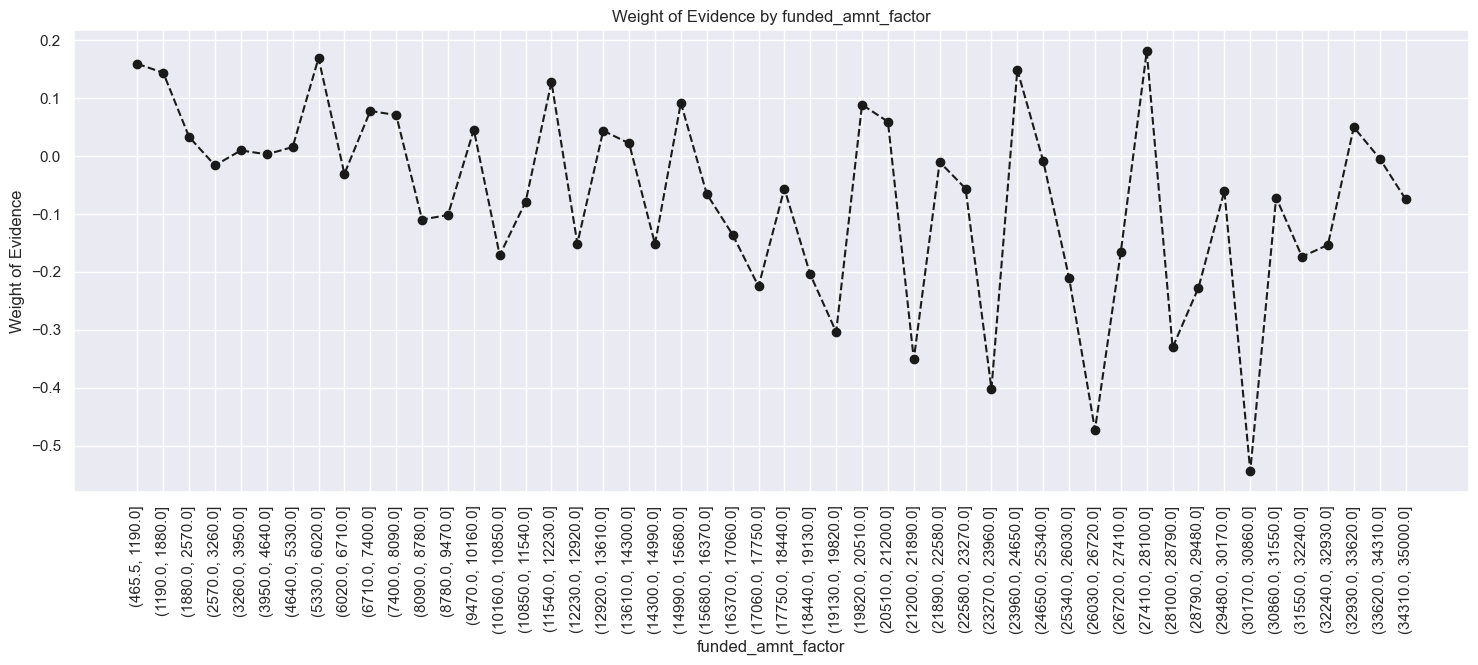

In [135]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Data Preparation: Continuous Variables

In [136]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.587, 11.74]     24   0.875000    0.000064    21.0   
1                      (11.74, 23.48]      0        NaN    0.000000     NaN   
2                      (23.48, 35.22]      0        NaN    0.000000     NaN   
3                      (35.22, 46.96]      0        NaN    0.000000     NaN   
4                       (46.96, 58.7]      0        NaN    0.000000     NaN   
..                                ...    ...        ...         ...     ...   
45                    (528.3, 540.04]    580   0.913793    0.001555   530.0   
46                   (540.04, 551.78]    471   0.915074    0.001263   431.0   
47                   (551.78, 563.52]    339   0.899705    0.000909   305.0   
48                   (563.52, 575.26]    347   0.893372    0.000930   310.0   
49                    (575.26, 587.0]   1230   0.884553    0.003297  1088.0   

    n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0     3.0     0.000063    0.000074 -0.151835             NaN       NaN   
1     NaN          NaN         NaN       NaN             NaN       NaN   
2     NaN          NaN         NaN       NaN             NaN       NaN   
3     NaN          NaN         NaN       NaN             NaN       NaN   
4     NaN          NaN         NaN       NaN             NaN       NaN   
..    ...          ...         ...       ...             ...       ...   
45   50.0     0.001595    0.001226  0.263109        0.011924  0.142686   
46   40.0     0.001297    0.000981  0.279484        0.001281  0.016375   
47   34.0     0.000918    0.000834  0.096206        0.015369  0.183277   
48   37.0     0.000933    0.000907  0.027909        0.006333  0.068297   
49  142.0     0.003275    0.003482 -0.061476        0.008819  0.089385   

          IV  
0   0.016273  
1   0.016273  
2   0.016273  
3   0.016273  
4   0.016273  
..       ...  
45  0.016273  
46  0.016273  
47  0.016273  
48  0.016273  
49  0.016273  

[50 rows x 12 columns]

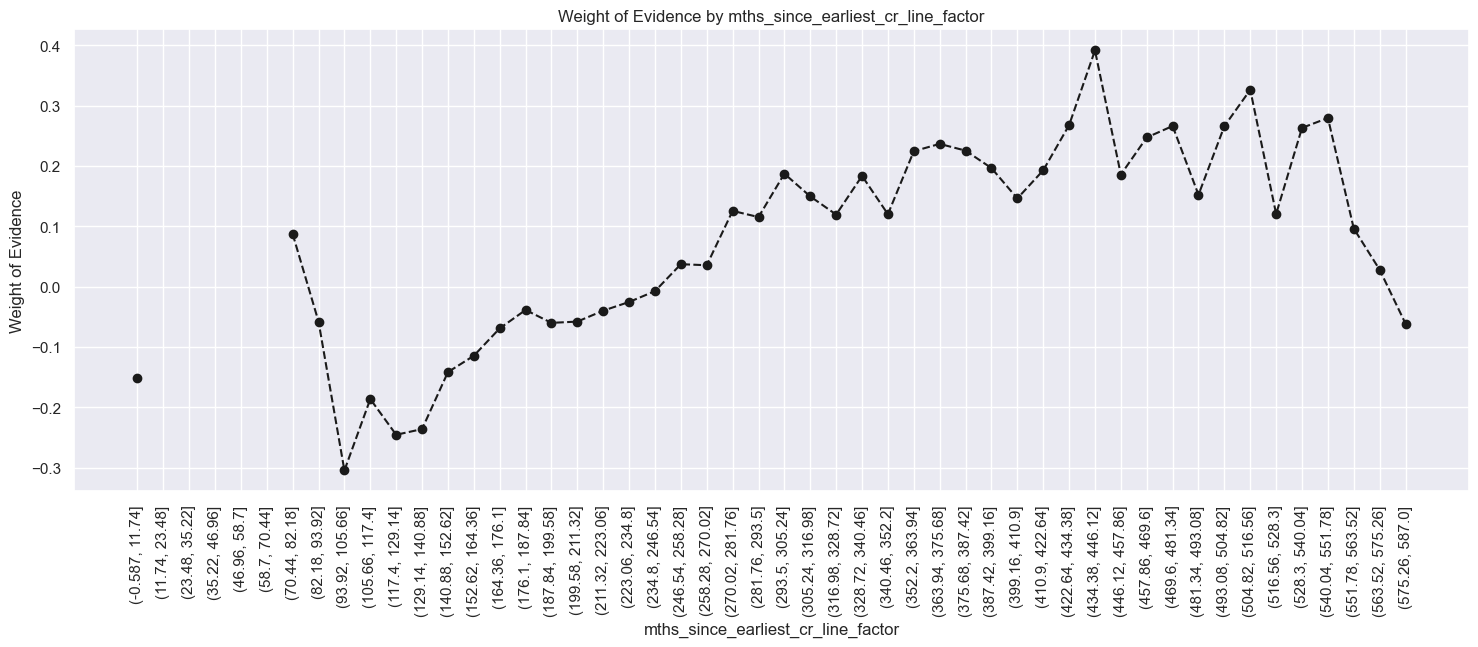

In [137]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

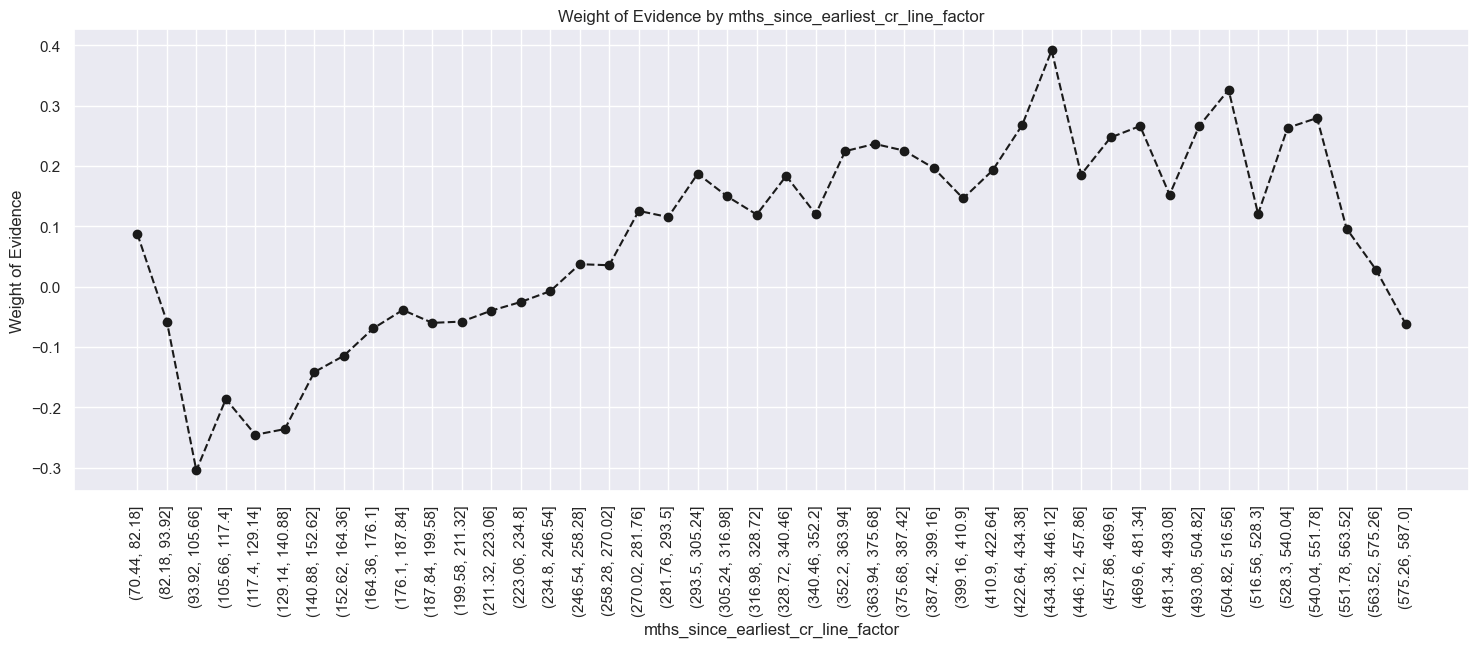

In [138]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [139]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [140]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  306417   0.890499    0.821432  272864.0  33553.0   
1           1.0   44927   0.893249    0.120439   40131.0   4796.0   
2           2.0   13118   0.889007    0.035166   11662.0   1456.0   
3           3.0    4550   0.883297    0.012197    4019.0    531.0   
4           4.0    1868   0.898822    0.005008    1679.0    189.0   
..          ...     ...        ...         ...       ...      ...   
19         19.0       2   1.000000    0.000005       2.0      0.0   
20         21.0       2   0.500000    0.000005       1.0      1.0   
21         22.0       2   1.000000    0.000005       2.0      0.0   
22         24.0       1   1.000000    0.000003       1.0      0.0   
23         29.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.821261    0.822821 -0.001898             NaN       NaN  inf  
1      0.120786    0.117612  0.026622        0.002750  0.028520  inf  
2      0.035100    0.035706 -0.017102        0.004242  0.043724  inf  
3      0.012096    0.013022 -0.073719        0.005711  0.056616  inf  
4      0.005053    0.004635  0.086462        0.015526  0.160180  inf  
..          ...         ...       ...             ...       ...  ...  
19     0.000006    0.000000       inf        0.333333       inf  inf  
20     0.000003    0.000025 -2.097745        0.500000       inf  inf  
21     0.000006    0.000000       inf        0.500000       inf  inf  
22     0.000003    0.000000       inf        0.000000       NaN  inf  
23     0.000003    0.000000       inf        0.000000       NaN  inf  

[24 rows x 12 columns]

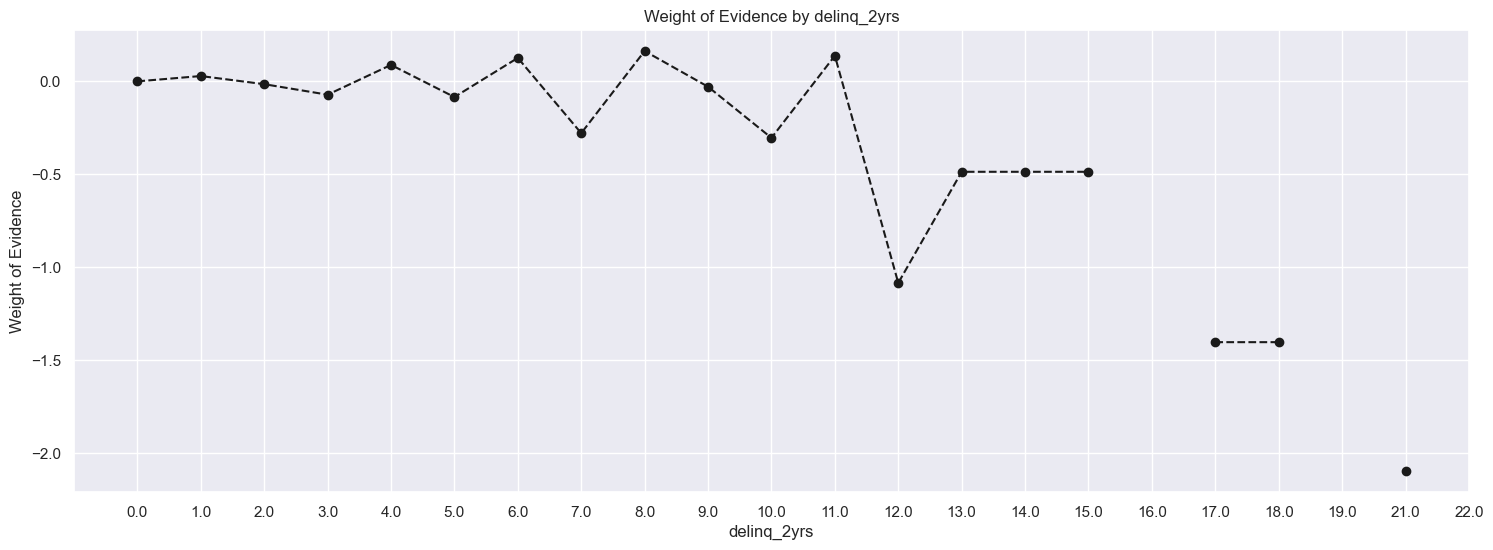

In [141]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [142]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [143]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  193232   0.908395    0.518009  175531.0  17701.0   
1              1.0  104163   0.884950    0.279236   92179.0  11984.0   
2              2.0   46214   0.864197    0.123889   39938.0   6276.0   
3              3.0   20040   0.839671    0.053723   16827.0   3213.0   
4              4.0    5810   0.848365    0.015575    4929.0    881.0   
..             ...     ...        ...         ...       ...      ...   
23            27.0       1   1.000000    0.000003       1.0      0.0   
24            28.0       1   1.000000    0.000003       1.0      0.0   
25            31.0       1   1.000000    0.000003       1.0      0.0   
26            32.0       1   0.000000    0.000003       0.0      1.0   
27            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528310    0.434082  0.196450             NaN       NaN  inf  
1      0.277439    0.293884 -0.057585        0.023446  0.254035  inf  
2      0.120205    0.153907 -0.247150        0.020753  0.189564  inf  
3      0.050646    0.078792 -0.441965        0.024526  0.194816  inf  
4      0.014835    0.021605 -0.375911        0.008694  0.066054  inf  
..          ...         ...       ...             ...       ...  ...  
23     0.000003    0.000000       inf        1.000000       inf  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf  
26     0.000000    0.000025      -inf        1.000000       inf  inf  
27     0.000000    0.000025      -inf        0.000000       NaN  inf  

[28 rows x 12 columns]

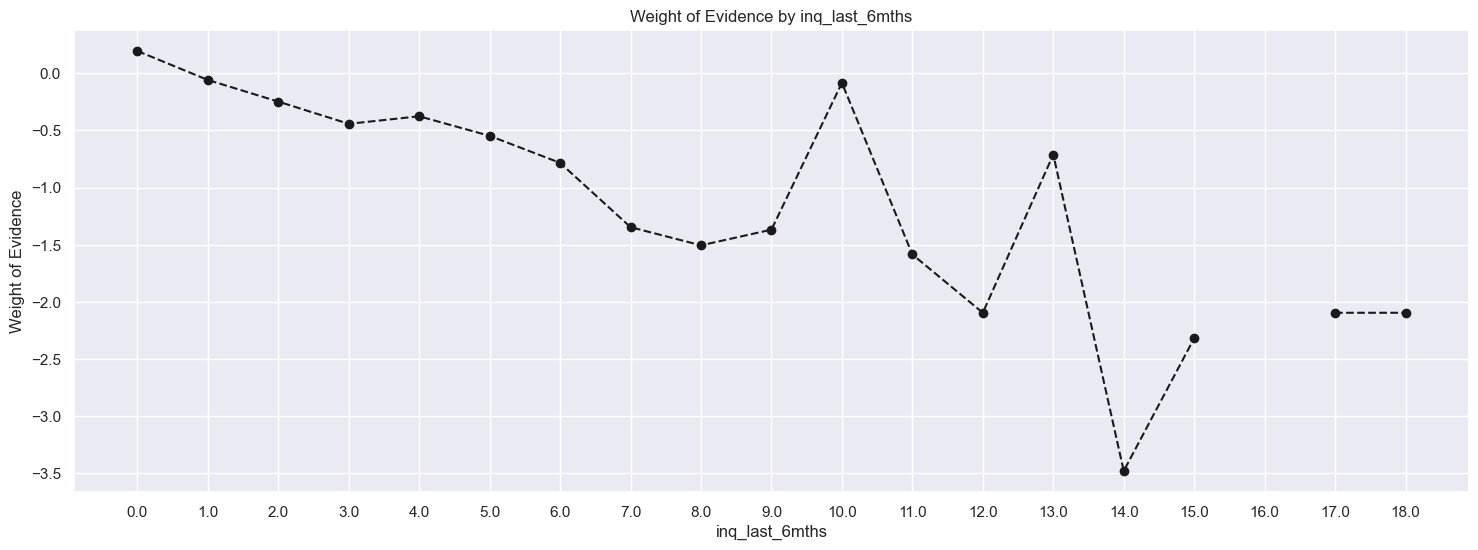

In [144]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [145]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [146]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0        0.0     29   0.758621    0.000078    22.0     7.0     0.000066   
1        1.0    110   0.872727    0.000295    96.0    14.0     0.000289   
2        2.0   1456   0.845467    0.003903  1231.0   225.0     0.003705   
3        3.0   4378   0.873687    0.011736  3825.0   553.0     0.011512   
4        4.0  10028   0.891504    0.026883  8940.0  1088.0     0.026907   
..       ...    ...        ...         ...     ...     ...          ...   
56      58.0      1   1.000000    0.000003     1.0     0.0     0.000003   
57      62.0      1   1.000000    0.000003     1.0     0.0     0.000003   
58      75.0      1   1.000000    0.000003     1.0     0.0     0.000003   
59      76.0      2   0.000000    0.000005     0.0     2.0     0.000000   
60      84.0      1   1.000000    0.000003     1.0     0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000172 -0.952613             NaN       NaN  inf  
1     0.000343 -0.172454        0.114107  0.780159  inf  
2     0.005518 -0.398263        0.027260  0.225809  inf  
3     0.013561 -0.163789        0.028220  0.234474  inf  
4     0.026681  0.008449        0.017817  0.172239  inf  
..         ...       ...             ...       ...  ...  
56    0.000000       inf        0.000000       NaN  inf  
57    0.000000       inf        0.000000       NaN  inf  
58    0.000000       inf        0.000000       NaN  inf  
59    0.000049      -inf        1.000000       inf  inf  
60    0.000000       inf        1.000000       inf  inf  

[61 rows x 12 columns]

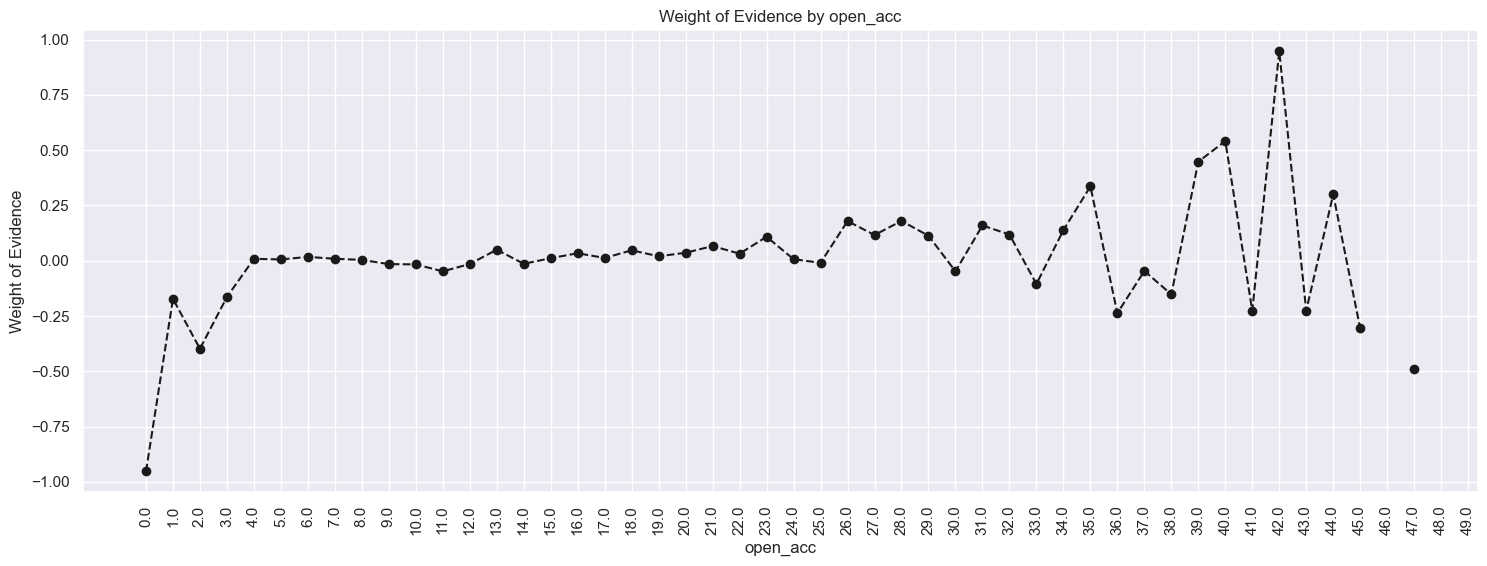

In [147]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

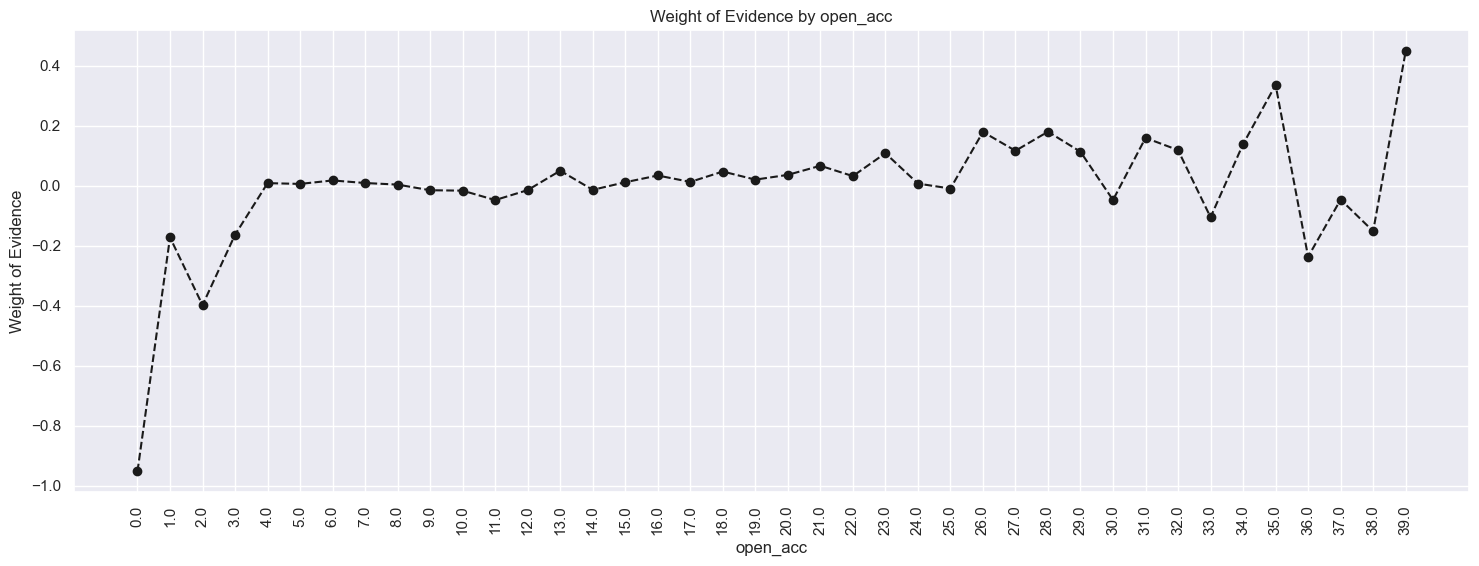

In [148]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [149]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [150]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  323999   0.889941    0.868565  288340.0  35659.0     0.867840   
1       1.0   42381   0.893419    0.113613   37864.0   4517.0     0.113962   
2       2.0    4527   0.903247    0.012136    4089.0    438.0     0.012307   
3       3.0    1280   0.920312    0.003431    1178.0    102.0     0.003546   
4       4.0     408   0.924020    0.001094     377.0     31.0     0.001135   
..      ...     ...        ...         ...       ...      ...          ...   
19     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     34.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.874467 -0.007606             NaN       NaN  inf  
1     0.110771  0.028408        0.003478  0.036014  inf  
2     0.010741  0.136092        0.009828  0.107684  inf  
3     0.002501  0.348856        0.017065  0.212764  inf  
4     0.000760  0.400513        0.003707  0.051657  inf  
..         ...       ...             ...       ...  ...  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf  

[24 rows x 12 columns]

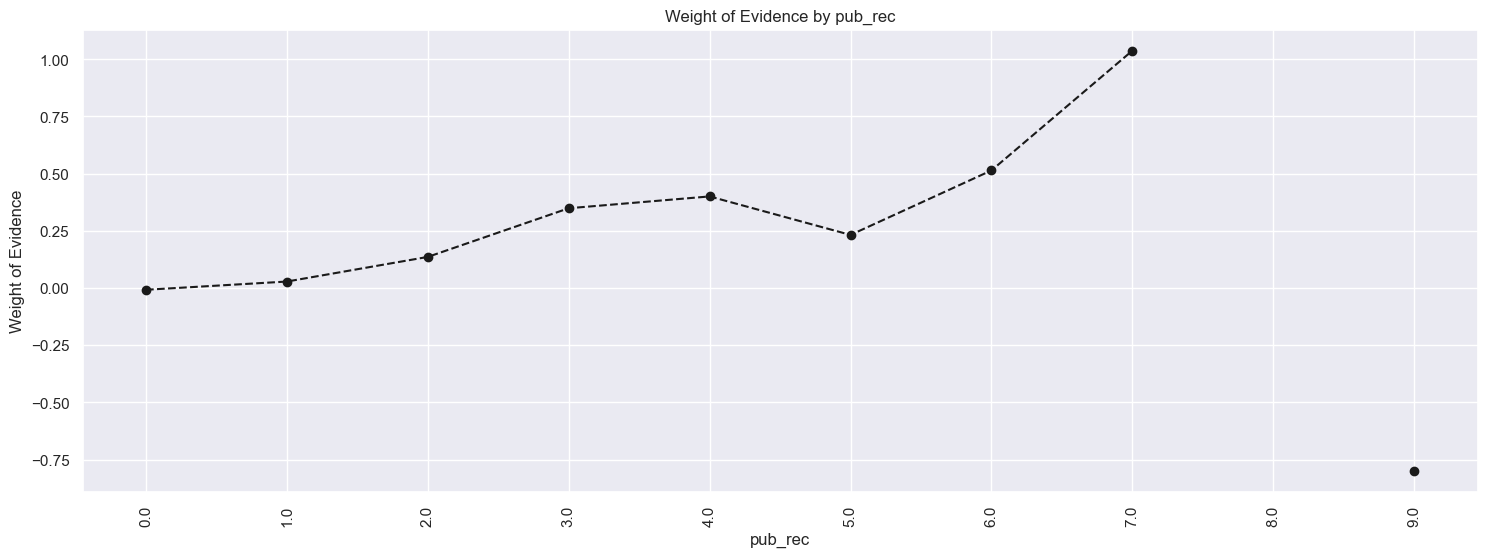

In [151]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [152]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [153]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-0.15, 3.0]    459   0.810458    0.001230    372.0    87.0   
1        (3.0, 6.0]   6004   0.864757    0.016095   5192.0   812.0   
2        (6.0, 9.0]  15047   0.873131    0.040337  13138.0  1909.0   
3       (9.0, 12.0]  25169   0.881283    0.067472  22181.0  2988.0   
4      (12.0, 15.0]  33651   0.881281    0.090210  29656.0  3995.0   
..              ...    ...        ...         ...      ...     ...   
45   (135.0, 138.0]      0        NaN    0.000000      NaN     NaN   
46   (138.0, 141.0]      0        NaN    0.000000      NaN     NaN   
47   (141.0, 144.0]      0        NaN    0.000000      NaN     NaN   
48   (144.0, 147.0]      0        NaN    0.000000      NaN     NaN   
49   (147.0, 150.0]      1   1.000000    0.000003      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001120    0.002134 -0.644759             NaN       NaN  inf  
1      0.015627    0.019913 -0.242371        0.054299  0.402388  inf  
2      0.039543    0.046814 -0.168816        0.008374  0.073555  inf  
3      0.066760    0.073275 -0.093113        0.008152  0.075703  inf  
4      0.089258    0.097969 -0.093124        0.000001  0.000011  inf  
..          ...         ...       ...             ...       ...  ...  
45          NaN         NaN       NaN             NaN       NaN  inf  
46          NaN         NaN       NaN             NaN       NaN  inf  
47          NaN         NaN       NaN             NaN       NaN  inf  
48          NaN         NaN       NaN             NaN       NaN  inf  
49     0.000003    0.000000       inf             NaN       NaN  inf  

[50 rows x 12 columns]

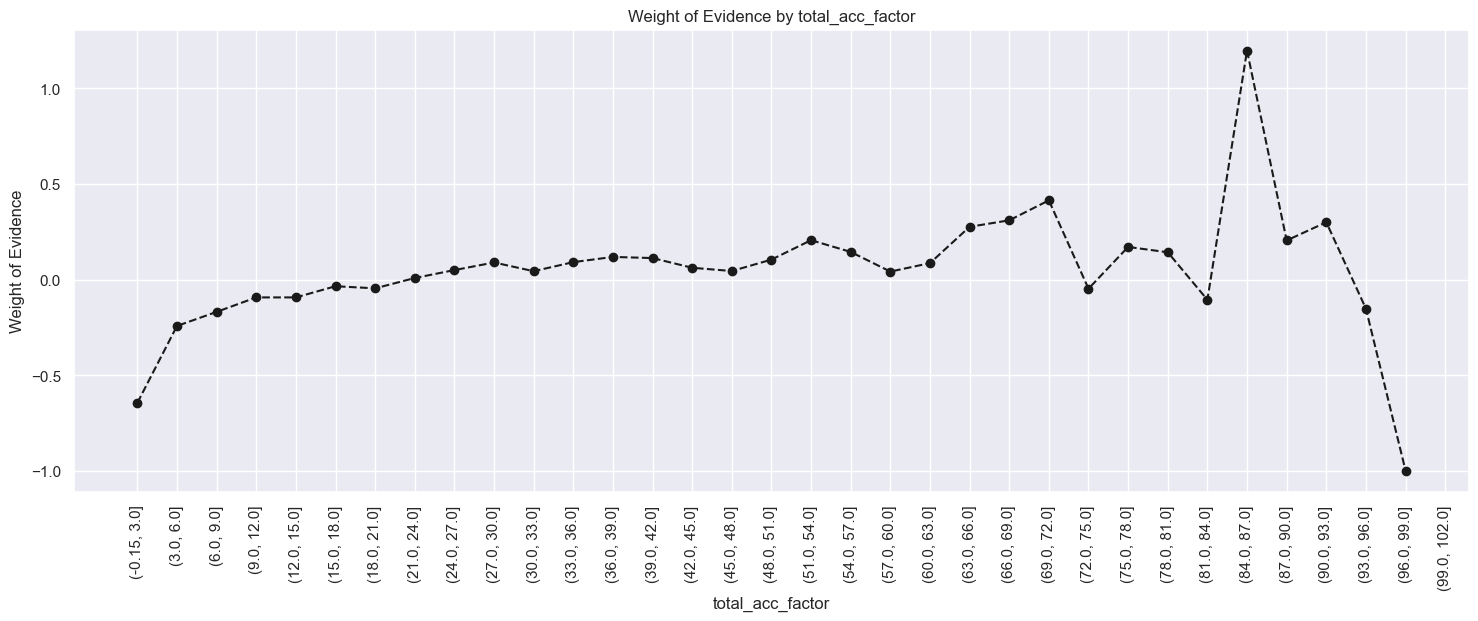

In [154]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [155]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [156]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  371682   0.890648    0.996392  331038.0  40644.0   
1             1.0    1263   0.899446    0.003386    1136.0    127.0   
2             2.0      70   0.928571    0.000188      65.0      5.0   
3             3.0       7   0.857143    0.000019       6.0      1.0   
4             4.0       4   1.000000    0.000011       4.0      0.0   
5             5.0       2   0.500000    0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996352    0.996714 -0.000363             NaN       NaN  inf  
1     0.003419    0.003114  0.093337        0.008797  0.093700  inf  
2     0.000196    0.000123  0.467204        0.029126  0.373868  inf  
3     0.000018    0.000025 -0.305986        0.071429  0.773190  inf  
4     0.000012    0.000000       inf        0.142857       inf  inf  
5     0.000003    0.000025 -2.097745        0.500000       inf  inf

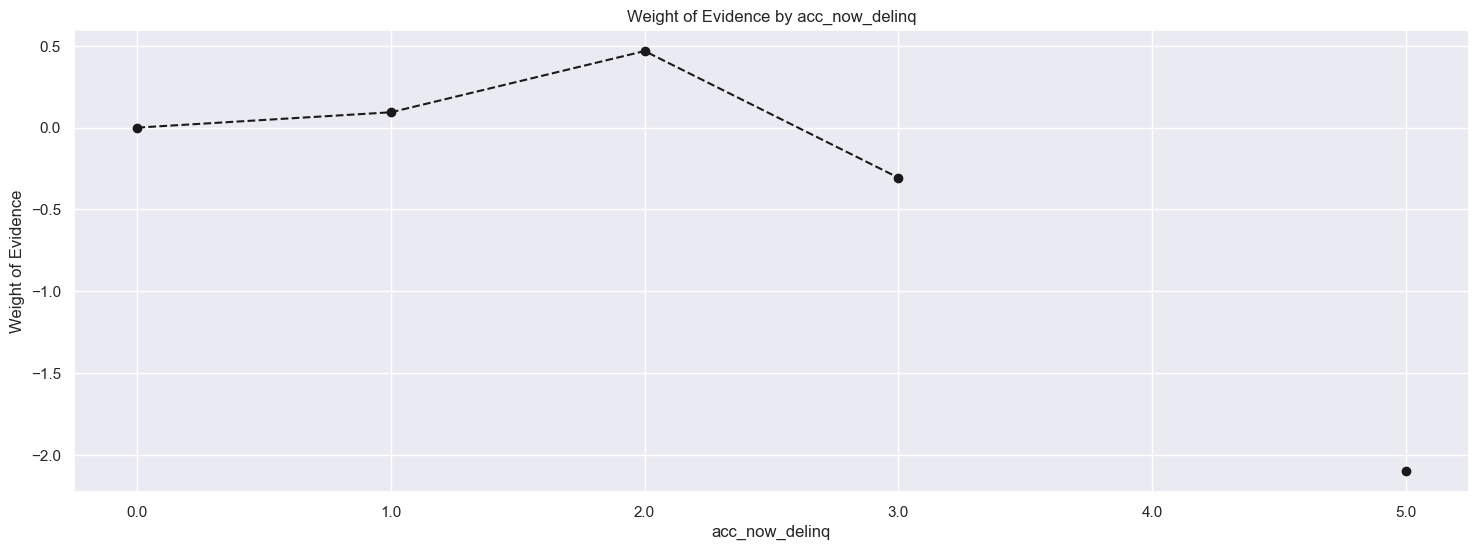

In [157]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [158]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [159]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  19417   0.866457    0.052052  16824.0   
1             (5000.0, 9999.999]  52655   0.876194    0.141156  46136.0   
2          (9999.999, 14999.998]  59570   0.880376    0.159693  52444.0   
3         (14999.998, 19999.998]  51455   0.877582    0.137939  45156.0   
4         (19999.998, 24999.997]  41582   0.885792    0.111472  36833.0   
...                          ...    ...        ...         ...      ...   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000      NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000      NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000      NaN   
1998    (9989999.001, 9994999.0]      0        NaN    0.000000      NaN   
1999      (9994999.0, 9999999.0]      2   1.000000    0.000005      2.0   

       n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     2593.0     0.050637    0.063588 -0.227754             NaN       NaN  inf  
1     6519.0     0.138859    0.159866 -0.140872        0.009737  0.086882  inf  
2     7126.0     0.157845    0.174751 -0.101749        0.004182  0.039123  inf  
3     6299.0     0.135910    0.154471 -0.128013        0.002794  0.026264  inf  
4     4749.0     0.110859    0.116460 -0.049285        0.008210  0.078728  inf  
...      ...          ...         ...       ...             ...       ...  ...  
1995     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1996     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1997     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1998     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.0     0.000006    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

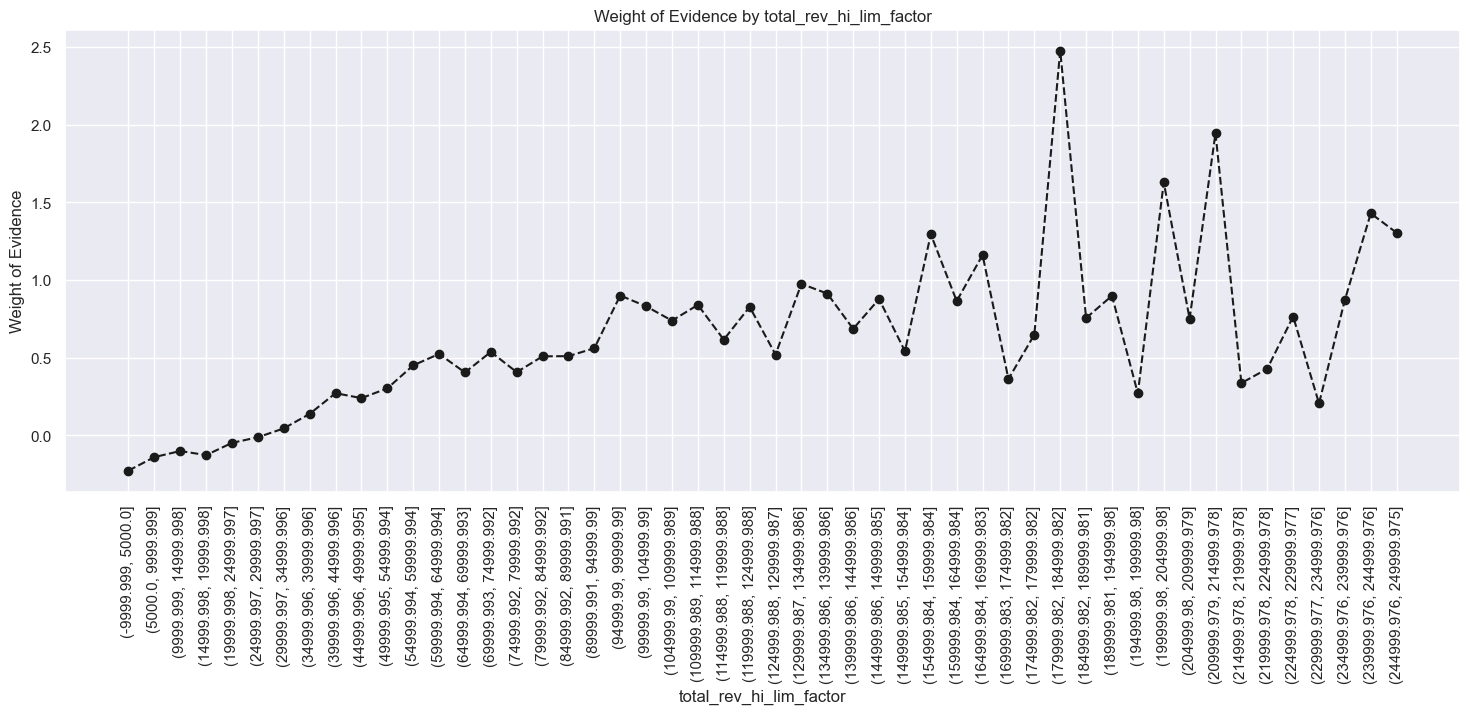

In [160]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [161]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [162]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good   n_bad  \
0       (14.276, 43.556]   1812   0.906181    0.004858  1642.0   170.0   
1       (43.556, 71.443]   4841   0.897542    0.012978  4345.0   496.0   
2       (71.443, 99.329]   6824   0.893025    0.018294  6094.0   730.0   
3      (99.329, 127.216]   9138   0.890348    0.024497  8136.0  1002.0   
4     (127.216, 155.102]  10040   0.896514    0.026915  9001.0  1039.0   
..                   ...    ...        ...         ...     ...     ...   
45  (1270.558, 1298.444]    457   0.829322    0.001225   379.0    78.0   
46  (1298.444, 1326.331]    197   0.761421    0.000528   150.0    47.0   
47  (1326.331, 1354.217]    121   0.760331    0.000324    92.0    29.0   
48  (1354.217, 1382.104]     41   0.707317    0.000110    29.0    12.0   
49   (1382.104, 1409.99]     36   0.805556    0.000097    29.0     7.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.004942    0.004169  0.170127             NaN       NaN  0.013497  
1      0.013078    0.012163  0.072460        0.008639  0.097667  0.013497  
2      0.018342    0.017902  0.024270        0.004517  0.048190  0.013497  
3      0.024488    0.024572 -0.003444        0.002677  0.027715  0.013497  
4      0.027091    0.025479  0.061332        0.006166  0.064776  0.013497  
..          ...         ...       ...             ...       ...       ...  
45     0.001141    0.001913 -0.516918        0.030031  0.229099  0.013497  
46     0.000451    0.001153 -0.937257        0.067900  0.420340  0.013497  
47     0.000277    0.000711 -0.943252        0.001091  0.005995  0.013497  
48     0.000087    0.000294 -1.215356        0.053014  0.272104  0.013497  
49     0.000087    0.000172 -0.676359        0.098238  0.538997  0.013497  

[50 rows x 12 columns]

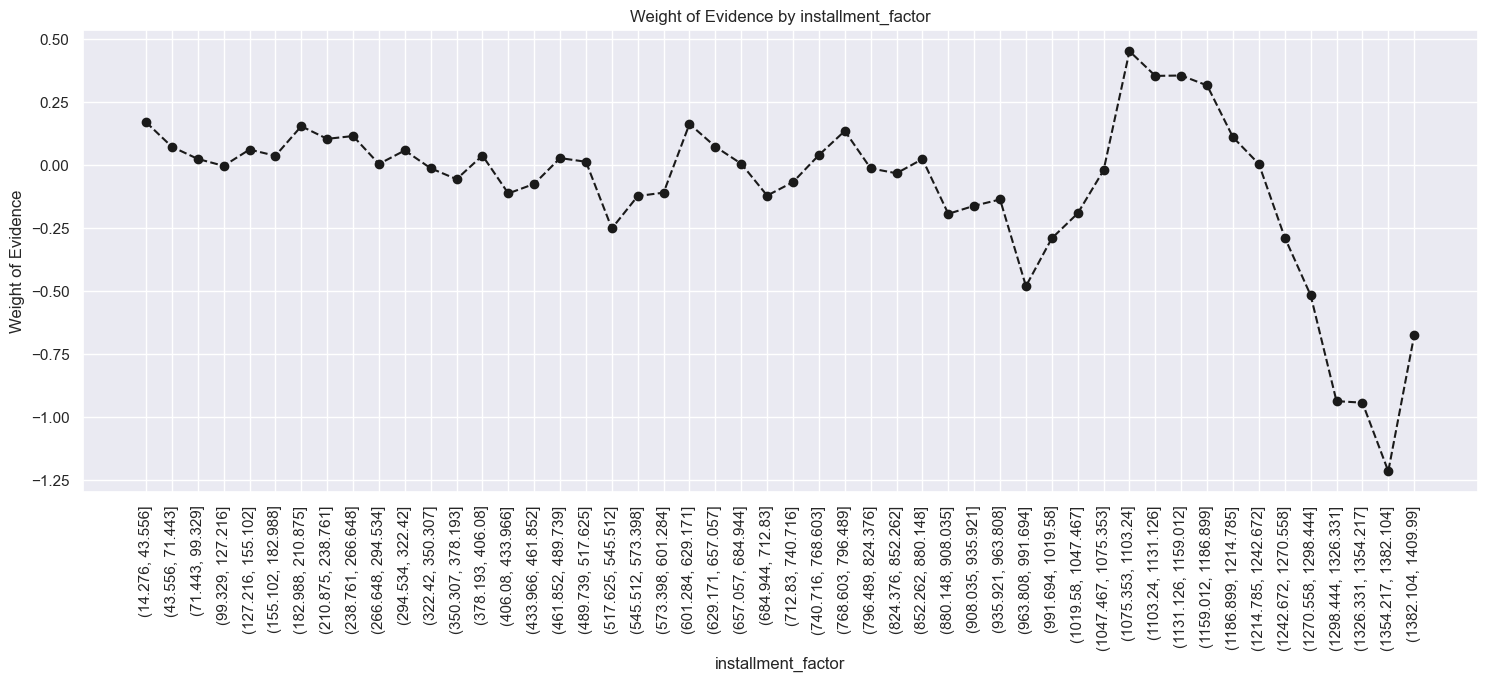

In [163]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [164]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0     (-5243.882, 144693.64]  351904   0.888566    0.943372  312690.0   
1     (144693.64, 287491.28]   19004   0.925437    0.050945   17587.0   
2     (287491.28, 430288.92]    1525   0.930492    0.004088    1419.0   
3     (430288.92, 573086.56]     332   0.939759    0.000890     312.0   
4      (573086.56, 715884.2]     112   0.883929    0.000300      99.0   
..                       ...     ...        ...         ...       ...   
45   (6427789.8, 6570587.44]       0        NaN    0.000000       NaN   
46  (6570587.44, 6713385.08]       0        NaN    0.000000       NaN   
47  (6713385.08, 6856182.72]       0        NaN    0.000000       NaN   
48  (6856182.72, 6998980.36]       0        NaN    0.000000       NaN   
49   (6998980.36, 7141778.0]       1   1.000000    0.000003       1.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   39214.0     0.941129    0.961646 -0.021567             NaN       NaN  inf  
1    1417.0     0.052933    0.034749  0.420873        0.036871  0.442440  inf  
2     106.0     0.004271    0.002599  0.496524        0.005055  0.075651  inf  
3      20.0     0.000939    0.000490  0.649526        0.009267  0.153002  inf  
4      13.0     0.000298    0.000319 -0.067574        0.055830  0.717100  inf  
..      ...          ...         ...       ...             ...       ...  ...  
45      NaN          NaN         NaN       NaN             NaN       NaN  inf  
46      NaN          NaN         NaN       NaN             NaN       NaN  inf  
47      NaN          NaN         NaN       NaN             NaN       NaN  inf  
48      NaN          NaN         NaN       NaN             NaN       NaN  inf  
49      0.0     0.000003    0.000000       inf             NaN       NaN  inf  

[50 rows x 12 columns]

In [165]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0      (-5243.882, 73294.82]  231445   0.875901    0.620449  202723.0   
1      (73294.82, 144693.64]  120459   0.912900    0.322922  109967.0   
2     (144693.64, 216092.46]   15885   0.925087    0.042584   14695.0   
3     (216092.46, 287491.28]    3119   0.927220    0.008361    2892.0   
4      (287491.28, 358890.1]    1117   0.929275    0.002994    1038.0   
..                       ...     ...        ...         ...       ...   
95   (6784783.9, 6856182.72]       0        NaN    0.000000       NaN   
96  (6856182.72, 6927581.54]       0        NaN    0.000000       NaN   
97  (6927581.54, 6998980.36]       0        NaN    0.000000       NaN   
98  (6998980.36, 7070379.18]       0        NaN    0.000000       NaN   
99   (7070379.18, 7141778.0]       1   1.000000    0.000003       1.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   28722.0     0.610152    0.704350 -0.143568             NaN       NaN  inf  
1   10492.0     0.330977    0.257296  0.251822        0.036998  0.395390  inf  
2    1190.0     0.044229    0.029182  0.415809        0.012187  0.163987  inf  
3     227.0     0.008704    0.005567  0.447009        0.002134  0.031200  inf  
4      79.0     0.003124    0.001937  0.477858        0.002055  0.030850  inf  
..      ...          ...         ...       ...             ...       ...  ...  
95      NaN          NaN         NaN       NaN             NaN       NaN  inf  
96      NaN          NaN         NaN       NaN             NaN       NaN  inf  
97      NaN          NaN         NaN       NaN             NaN       NaN  inf  
98      NaN          NaN         NaN       NaN             NaN       NaN  inf  
99      0.0     0.000003    0.000000       inf             NaN       NaN  inf  

[100 rows x 12 columns]

In [166]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [167]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\saras\AppData\Local\Temp\ipykernel_33392\2604529898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (1757.896, 4658.08]     15   0.800000    0.000043    12.0    3.0   
1       (4658.08, 7420.16]     40   0.750000    0.000114    30.0   10.0   
2      (7420.16, 10182.24]    287   0.874564    0.000818   251.0   36.0   
3     (10182.24, 12944.32]    547   0.828154    0.001558   453.0   94.0   
4      (12944.32, 15706.4]   1210   0.830579    0.003447  1005.0  205.0   
..                     ...    ...        ...         ...     ...    ...   
45   (126189.6, 128951.68]    791   0.917826    0.002253   726.0   65.0   
46  (128951.68, 131713.76]   3033   0.930762    0.008639  2823.0  210.0   
47  (131713.76, 134475.84]    801   0.923845    0.002282   740.0   61.0   
48  (134475.84, 137237.92]   1902   0.942166    0.005418  1792.0  110.0   
49   (137237.92, 140000.0]   2532   0.924171    0.007212  2340.0  192.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000038    0.000077 -0.689458             NaN       NaN  0.049818  
1      0.000096    0.000256 -0.977140        0.050000  0.287682  0.049818  
2      0.000805    0.000920 -0.133818        0.124564  0.843322  0.049818  
3      0.001452    0.002402 -0.503155        0.046411  0.369337  0.049818  
4      0.003222    0.005238 -0.486019        0.002425  0.017135  0.049818  
..          ...         ...       ...             ...       ...       ...  
45     0.002327    0.001661  0.337411        0.003936  0.053356  0.049818  
46     0.009050    0.005366  0.522696        0.012936  0.185285  0.049818  
47     0.002372    0.001559  0.420024        0.006916  0.102672  0.049818  
48     0.005745    0.002811  0.714855        0.018321  0.294831  0.049818  
49     0.007502    0.004906  0.424659        0.017996  0.290196  0.049818  

[50 rows x 12 columns]

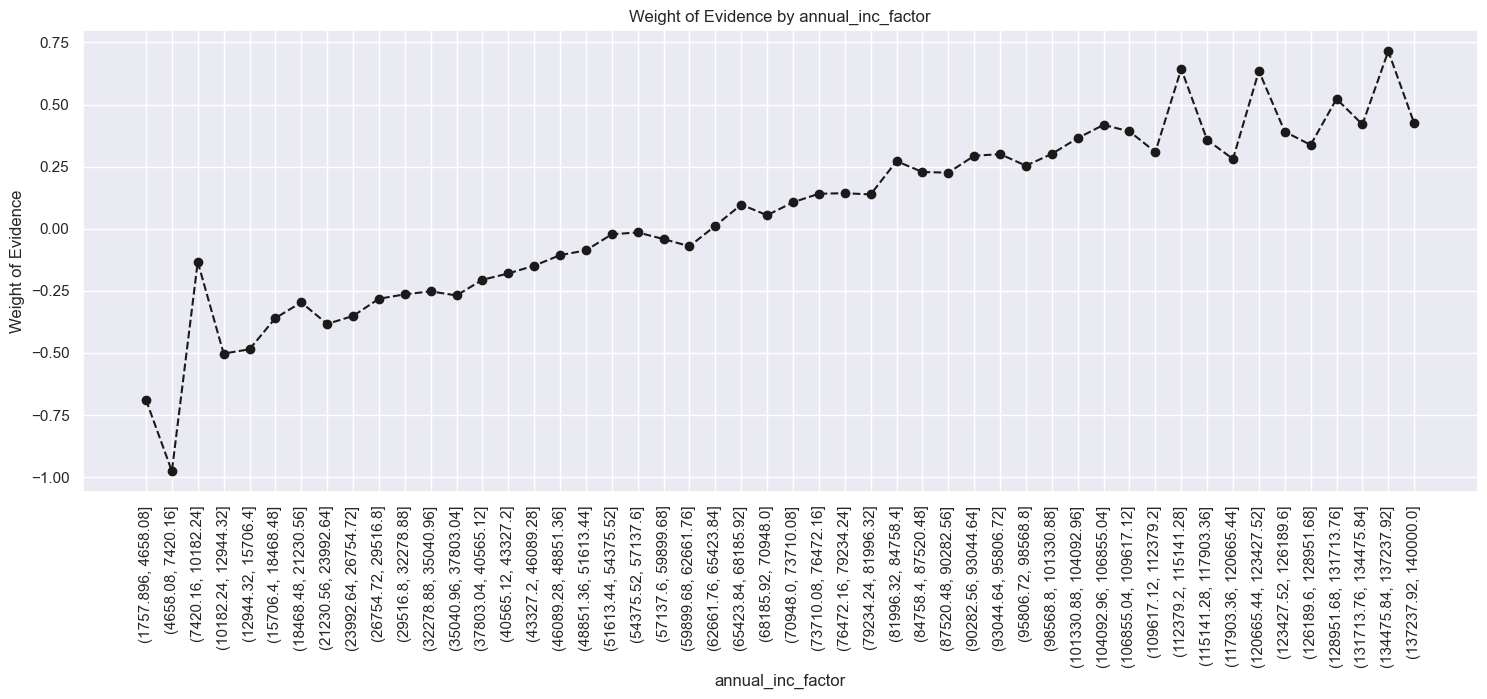

In [168]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [169]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [170]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\saras\AppData\Local\Temp\ipykernel_33392\1373989647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   5277   0.871518    0.030531   4599.0   
1                   (3.76, 7.52]  11167   0.887615    0.064608   9912.0   
2                  (7.52, 11.28]  13306   0.892830    0.076983  11880.0   
3                 (11.28, 15.04]  13216   0.888847    0.076462  11747.0   
4                  (15.04, 18.8]   9337   0.894934    0.054020   8356.0   
..                           ...    ...        ...         ...      ...   
45               (169.2, 172.96]      0        NaN    0.000000      NaN   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000006      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    678.0     0.029814    0.036481 -0.201825             NaN       NaN  inf  
1   1255.0     0.064256    0.067528 -0.049661        0.016097  0.152164  inf  
2   1426.0     0.077014    0.076729  0.003711        0.005215  0.053372  inf  
3   1469.0     0.076152    0.079042 -0.037256        0.003983  0.040967  inf  
4    981.0     0.054169    0.052785  0.025891        0.006087  0.063147  inf  
..     ...          ...         ...       ...             ...       ...  ...  
45     NaN          NaN         NaN       NaN             NaN       NaN  inf  
46     NaN          NaN         NaN       NaN             NaN       NaN  inf  
47     0.0     0.000006    0.000000       inf             NaN       NaN  inf  
48     NaN          NaN         NaN       NaN             NaN       NaN  inf  
49     0.0     0.000006    0.000000       inf             NaN       NaN  inf  

[50 rows x 12 columns]

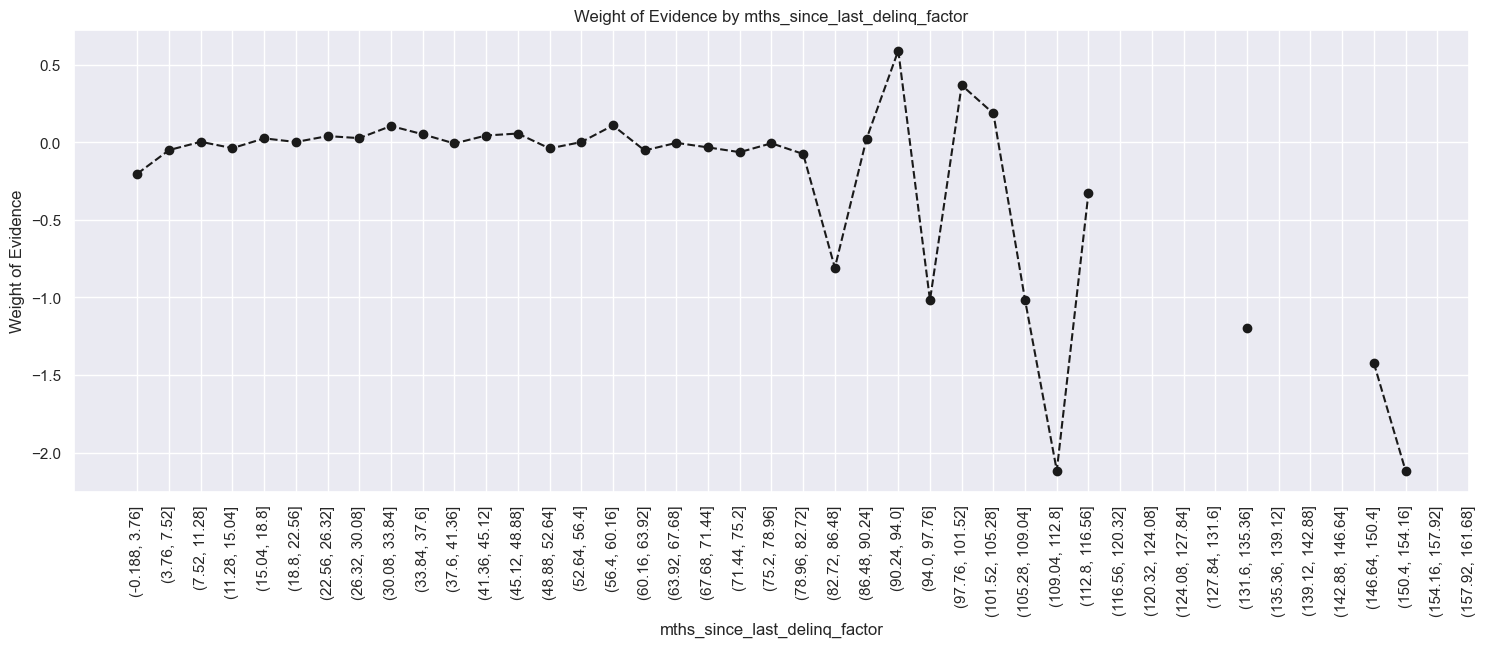

In [171]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [172]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables

In [173]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      (-0.04, 0.4]    745   0.876510    0.001997   653.0   92.0     0.001965   
1        (0.4, 0.8]    808   0.919554    0.002166   743.0   65.0     0.002236   
2        (0.8, 1.2]    922   0.896963    0.002472   827.0   95.0     0.002489   
3        (1.2, 1.6]   1043   0.896453    0.002796   935.0  108.0     0.002814   
4        (1.6, 2.0]   1172   0.902730    0.003142  1058.0  114.0     0.003184   
..              ...    ...        ...         ...     ...    ...          ...   
95  (37.991, 38.39]    202   0.856436    0.000542   173.0   29.0     0.000521   
96   (38.39, 38.79]    193   0.880829    0.000517   170.0   23.0     0.000512   
97   (38.79, 39.19]    192   0.869792    0.000515   167.0   25.0     0.000503   
98   (39.19, 39.59]    183   0.918033    0.000491   168.0   15.0     0.000506   
99   (39.59, 39.99]    186   0.892473    0.000499   166.0   20.0     0.000500   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.002256 -0.137956             NaN       NaN  0.028446  
1     0.001594  0.338564        0.043044  0.476520  0.028446  
2     0.002330  0.066183        0.022591  0.272381  0.028446  
3     0.002648  0.060670        0.000511  0.005513  0.028446  
4     0.002796  0.130192        0.006278  0.069522  0.028446  
..         ...       ...             ...       ...       ...  
95    0.000711 -0.311749        0.060231  0.611900  0.028446  
96    0.000564 -0.097441        0.024393  0.214308  0.028446  
97    0.000613 -0.198627        0.011037  0.101186  0.028446  
98    0.000368  0.318169        0.048241  0.516796  0.028446  
99    0.000490  0.018511        0.025560  0.299658  0.028446  

[100 rows x 12 columns]

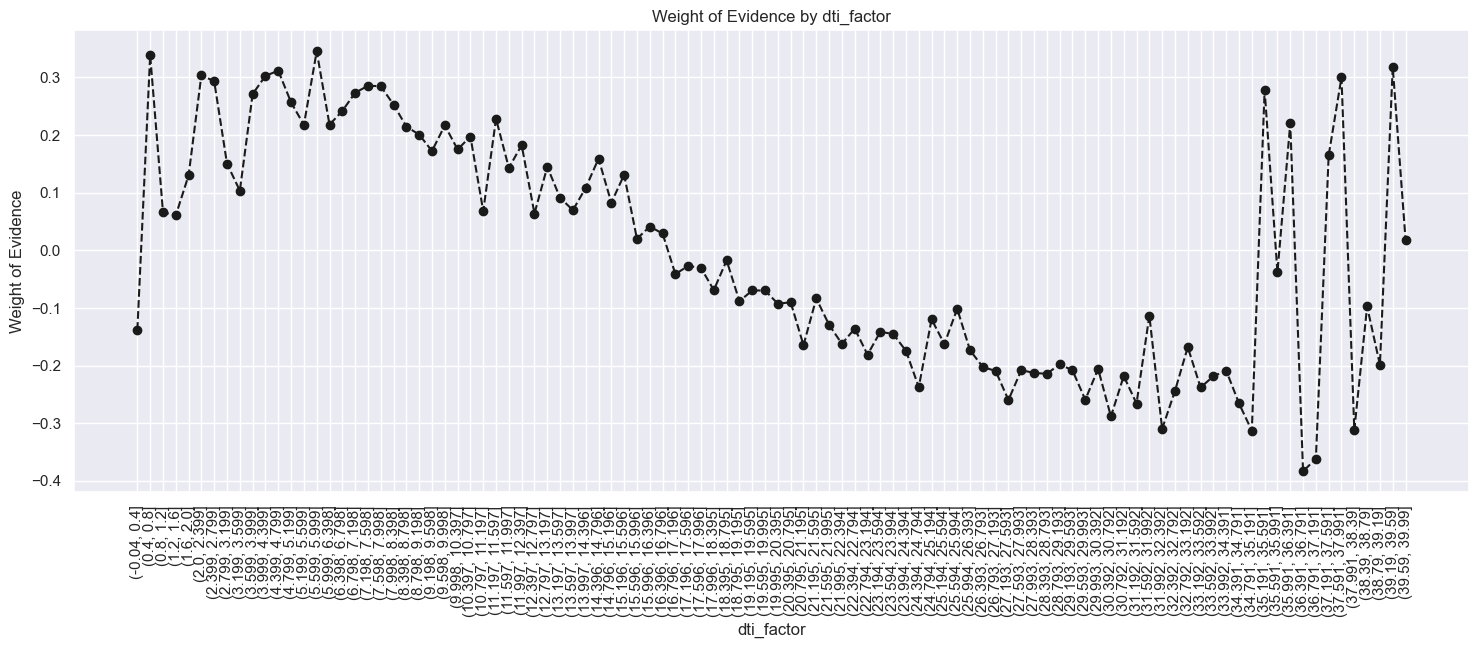

In [174]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [175]:

# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [176]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\saras\AppData\Local\Temp\ipykernel_33392\337294594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]   1366   0.894583    0.003690  1222.0  144.0     0.003707   
1      (0.7, 1.4]   1664   0.893029    0.004496  1486.0  178.0     0.004507   
2      (1.4, 2.1]   1986   0.912890    0.005365  1813.0  173.0     0.005499   
3      (2.1, 2.8]   2594   0.913261    0.007008  2369.0  225.0     0.007186   
4      (2.8, 3.5]   3135   0.903030    0.008470  2831.0  304.0     0.008587   
..            ...    ...        ...         ...     ...    ...          ...   
45   (31.5, 32.2]   2945   0.873345    0.007956  2572.0  373.0     0.007801   
46   (32.2, 32.9]   2617   0.860145    0.007070  2251.0  366.0     0.006828   
47   (32.9, 33.6]   2438   0.870386    0.006587  2122.0  316.0     0.006436   
48   (33.6, 34.3]   2321   0.869884    0.006270  2019.0  302.0     0.006124   
49   (34.3, 35.0]   1987   0.857071    0.005368  1703.0  284.0     0.005165   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.003560  0.040465             NaN       NaN  0.027289  
1     0.004400  0.024094        0.001554  0.016371  0.027289  
2     0.004276  0.251481        0.019861  0.227387  0.027289  
3     0.005562  0.256157        0.000371  0.004676  0.027289  
4     0.007515  0.133392        0.010231  0.122765  0.027289  
..         ...       ...             ...       ...       ...  
45    0.009220 -0.167105        0.009005  0.079047  0.027289  
46    0.009047 -0.281469        0.013199  0.114364  0.027289  
47    0.007811 -0.193594        0.010240  0.087876  0.027289  
48    0.007465 -0.198035        0.000502  0.004442  0.027289  
49    0.007020 -0.306793        0.012813  0.108758  0.027289  

[50 rows x 12 columns]

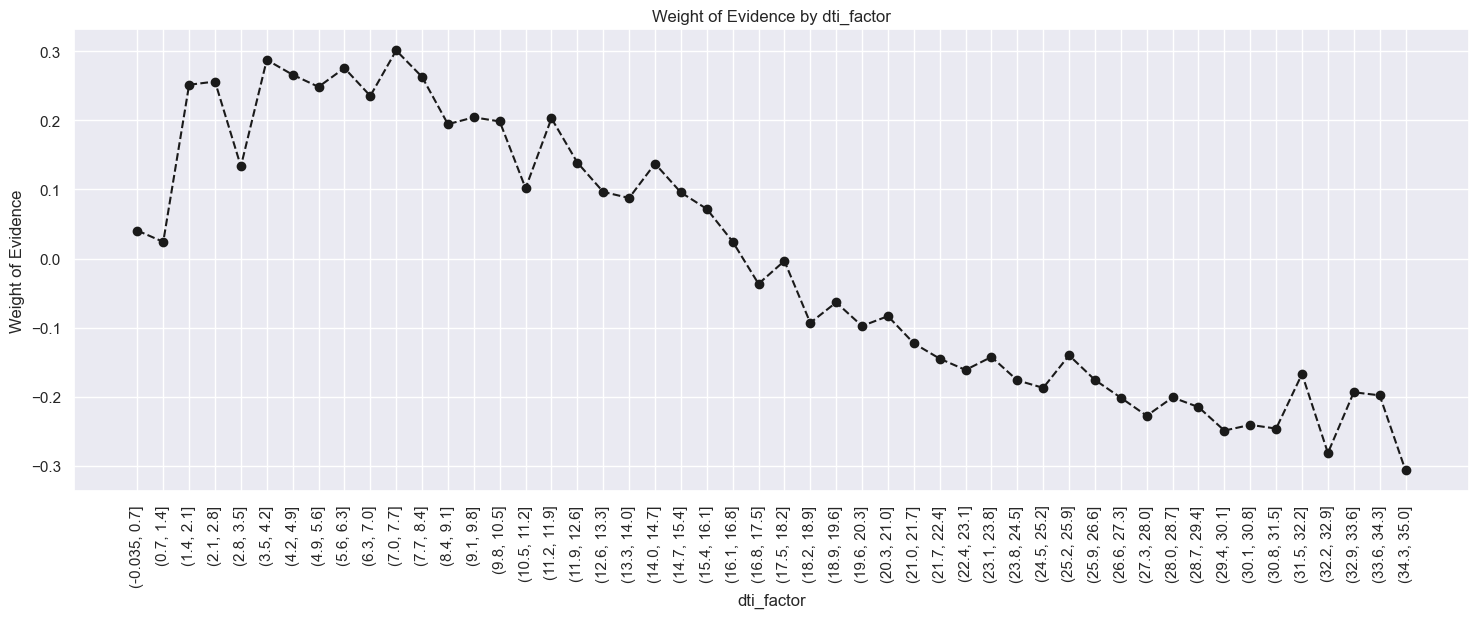

In [177]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [178]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [179]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\saras\AppData\Local\Temp\ipykernel_33392\3035104871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.121, 2.42]   1086   0.764273    0.021691   830.0  256.0   
1                   (2.42, 4.84]     76   0.894737    0.001518    68.0    8.0   
2                   (4.84, 7.26]    163   0.914110    0.003256   149.0   14.0   
3                   (7.26, 9.68]    156   0.903846    0.003116   141.0   15.0   
4                   (9.68, 12.1]    292   0.907534    0.005832   265.0   27.0   
..                           ...    ...        ...         ...     ...    ...   
45               (108.9, 111.32]   2296   0.884146    0.045859  2030.0  266.0   
46              (111.32, 113.74]   1461   0.887064    0.029181  1296.0  165.0   
47              (113.74, 116.16]   2037   0.867943    0.040685  1768.0  269.0   
48              (116.16, 118.58]   1236   0.906149    0.024687  1120.0  116.0   
49               (118.58, 121.0]    371   0.878706    0.007410   326.0   45.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.018569    0.047672 -0.942830             NaN       NaN  0.080659  
1      0.001521    0.001490  0.020988        0.130464  0.963818  0.080659  
2      0.003334    0.002607  0.245810        0.019374  0.224823  0.080659  
3      0.003155    0.002793  0.121631        0.010264  0.124179  0.080659  
4      0.005929    0.005028  0.164814        0.003688  0.043183  0.080659  
..          ...         ...       ...             ...       ...       ...  
45     0.045417    0.049534 -0.086784        0.000395  0.003862  0.080659  
46     0.028995    0.030726 -0.057986        0.002917  0.028798  0.080659  
47     0.039555    0.050093 -0.236186        0.019121  0.178200  0.080659  
48     0.025058    0.021601  0.148415        0.038206  0.384601  0.080659  
49     0.007294    0.008380 -0.138844        0.027443  0.287259  0.080659  

[50 rows x 12 columns]

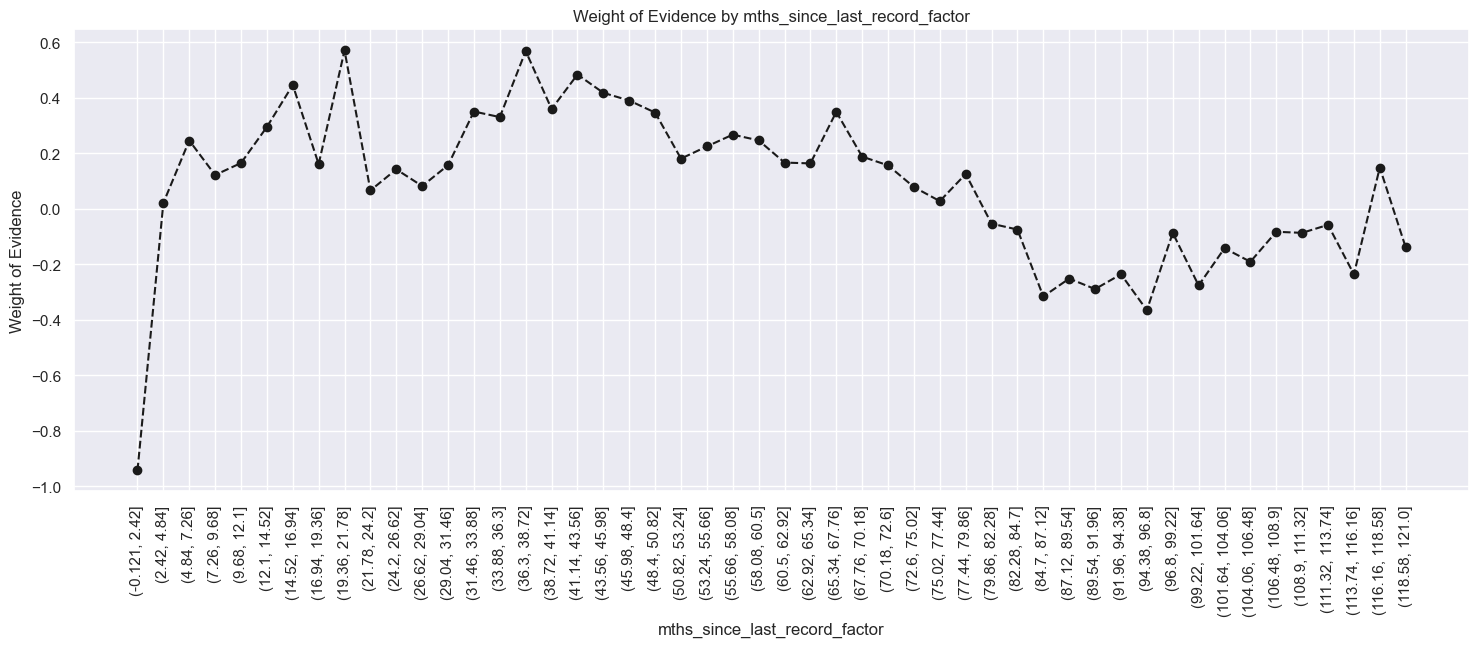

In [180]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [181]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test Dataset

In [182]:
#####
loan_data_inputs_train = df_inputs_prepr
#####
# loan_data_inputs_test = df_inputs_prepr

In [183]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
# loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
# loan_data_targets_test.to_csv('loan_data_targets_test.csv')

In [184]:
loan_data_inputs_train.shape

(373028, 324)

In [185]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
df1 = df1.iloc[:, [0, 1, 3]]
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])



if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])



df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])



df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])


# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)

# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

loan_data_inputs_test = df_inputs_prepr


loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')

C:\Users\saras\AppData\Local\Temp\ipykernel_33392\2545017857.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
C:\Users\saras\AppData\Local\Temp\ipykernel_33392\2545017857.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\saras\AppData\Local\Temp\ipykernel_33392\2545017857.py:215: Setting